# Credit Card Users Churn Prediction

###**Name:** Ben McGahee
###**Date:** 7/20/2024

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

In [ ]:
#Libraries for reading and manipulating data
import pandas as pd
import numpy as np

#Libaries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#For splitting data into training and testing sets
from sklearn.model_selection import train_test_split

#For imputing missing values
from sklearn.impute import SimpleImputer

#For generating different metric scores for the models
from sklearn.metrics import accuracy_score, recall_score,  precision_score, f1_score

#For oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#For Randomized Search to do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

#For building models using decision tree and boosting techniques
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from xgboost import XGBClassifier

#Define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

#Prevent scientific notation to be displayed in numerical columns
pd.set_option("display.float_format", lambda x: "%.3f" % x)

#Do not show warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
#Access Google Drive
from google.colab import drive
drive.mount('/content/drive')

#Read BankChurners.csv data
churn = pd.read_csv('/content/drive/MyDrive/Data/BankChurners.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Overview

In [ ]:
#Create a copy of the churn dataset
data = churn.copy()

In [ ]:
#View first 5 rows of data
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [ ]:
#View last 5 rows of data
data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


In [ ]:
#Check shape of dataset
data.shape

(10127, 21)

* There are 10,127 rows and 21 columns in the data

In [ ]:
#Get info of the dataset - view column names, data types, and see if there are any missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

* The majority of the 21 columns are numerical - int64 / float64
* Six columns are object type, which represent categorical data
* Only Education_Level and Marital_Status have missing values

In [ ]:
#Find total number of missing values in the data
data.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

* Missing Value Counts:
  * Education_Level - 1,519
  * Marital_Status - 749

In [ ]:
#Check for duplicate values
data.duplicated().sum()

0

* There are no duplicate records in the data

In [ ]:
#View summary statistics for the numerical columns
data.describe(include=['int64', 'float64']).T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


* Customer Age values appear to be reasonable in the adult range from 26 to 73 years
* Some customers have a very low credit limit of over \$1,400
* Other customers have a very high credit limit of over \$34,500
* Some customers have no inactivity while other customers have been inactive up to 6 months
* Customers can generate anywhere between 10 to 139 transactions in past 12 months
* Transaction amounts range from \$510 to \$18,484 for past 12 months
* Average Utilization Ratios of 0% and 99.9% show that:
  * Some customers have not made a purchase on their credit cards
  * Other customers have spent close to their maximum limit on their credit cards

In [ ]:
#View summary statistics for the object columns
data.describe(include=['object']).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


* The majority of the customer base has the following characteristics:
  * Existing Customer Status - 83.9%
  * Females - 52.9%
  * Graduate degree holders - 36.3%
  * Married - 49.9%
  * Annual income is less than \$40K - 35.2%
  * Own a Blue credit card - 93.2%

In [ ]:
#Get value counts for unique values in each categorical column (object type)
for column in data.columns:
    if data[column].dtype == 'object':
        print(data[column].value_counts(normalize=True))
        print('-' * 50)

Attrition_Flag
Existing Customer   0.839
Attrited Customer   0.161
Name: proportion, dtype: float64
--------------------------------------------------
Gender
F   0.529
M   0.471
Name: proportion, dtype: float64
--------------------------------------------------
Education_Level
Graduate        0.363
High School     0.234
Uneducated      0.173
College         0.118
Post-Graduate   0.060
Doctorate       0.052
Name: proportion, dtype: float64
--------------------------------------------------
Marital_Status
Married    0.500
Single     0.420
Divorced   0.080
Name: proportion, dtype: float64
--------------------------------------------------
Income_Category
Less than $40K   0.352
$40K - $60K      0.177
$80K - $120K     0.152
$60K - $80K      0.138
abc              0.110
$120K +          0.072
Name: proportion, dtype: float64
--------------------------------------------------
Card_Category
Blue       0.932
Silver     0.055
Gold       0.011
Platinum   0.002
Name: proportion, dtype: float64
---

###**Observations:**

* Attrition Flag:
  * 84% are existing customers
  * 16% are attrited customers
* Gender:
  * 53% are female
  * 47% are male
* Education Level:
  * 17% are uneducated
  * 23% have a high school education
  * 48% have at least a college degree or graduate degree
  * 12% have an advanced or doctoral degree
* Marital Status:
  * 50% are married
  * 42% are single
  * 8% are divorced
* Income Category:
  * 35% make less than \$40K each year
  * 18% make between \$40K to \$60K each year
  * 14% make between \$60K to \$80K each year
  * 15% make between \$80K to \$120K each year
  * 7% make over \$120K each year
  * 11% belong to "abc" category - may represent unknown
* Card Category:
  * 93.2% have a Blue credit card
  * 5.5% have a Silver credit card
  * 1.1% have a Gold credit card
  * 0.02% have a Platinum credit card


## Exploratory Data Analysis (EDA)

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
#Function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None, title_name=''):
    #Set up boxplot and histogram subplots figure
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    #Plot boxplot - show mean with triangle
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )
    #Plot histogram
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )
    #Indicate mean with green dotted line
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )
    #Indicate median with black dotted line
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )

    plt.show()

In [ ]:
#Function to plot distributions
def distribution_plot_wrt_target(data, predictor, target):

    #Set figure size
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    #Get unique target values
    target_uniq = data[target].unique()

    #Plot histogram of target - Existing Customers
    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    #Plot histogram of target - Attrited Customers
    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    #Plot boxplot (with outliers) of predictor vs target
    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    #Plot boxplot (without outliers) of predictor vs target - w.r.t Attrition Flag
    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()

    plt.show()

###**1. Total Transaction Amount Distribution**

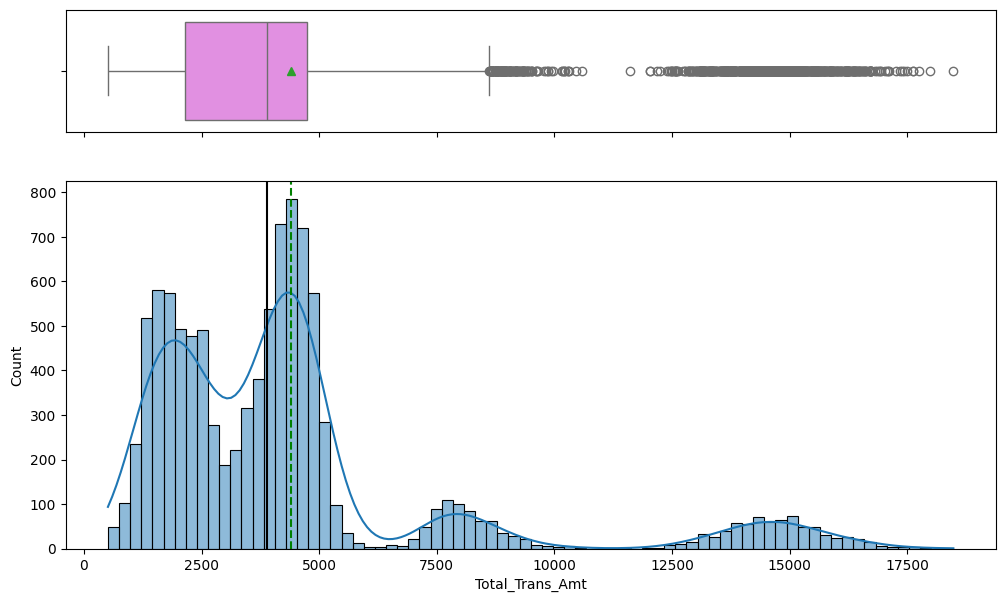

In [ ]:
#Plot the histogram and boxplot of Total Transaction Amount column
histogram_boxplot(data, 'Total_Trans_Amt', figsize=(12, 7), kde=True)

In [ ]:
#Get the mode, mean, and median values
data['Total_Trans_Amt'].mode(), data['Total_Trans_Amt'].mean(), data['Total_Trans_Amt'].median()

(0    4253
 1    4509
 Name: Total_Trans_Amt, dtype: int64,
 4404.086303939963,
 3899.0)

In [ ]:
#Get value counts for Total Transaction Amount
data['Total_Trans_Amt'].value_counts()

Total_Trans_Amt
4253     11
4509     11
4518     10
2229     10
4220      9
         ..
1274      1
4521      1
3231      1
4394      1
10294     1
Name: count, Length: 5033, dtype: int64

###**Observations:**

* Histogram shows that Total Transaction Amount is a bimodal and somewhat right skewed distribution
  * Mode: \$4,253 and \$4,509 - 22 customers spent these amounts (11 for each amount)
  * Median: \$3,899
  * Mean: \$4,404.09
* Boxplot indicates several outliers exist

###**2. Level of Education Distribution**

In [ ]:
#Get value counts for Level of Education
data['Education_Level'].value_counts(normalize=True)

Education_Level
Graduate        0.363
High School     0.234
Uneducated      0.173
College         0.118
Post-Graduate   0.060
Doctorate       0.052
Name: proportion, dtype: float64

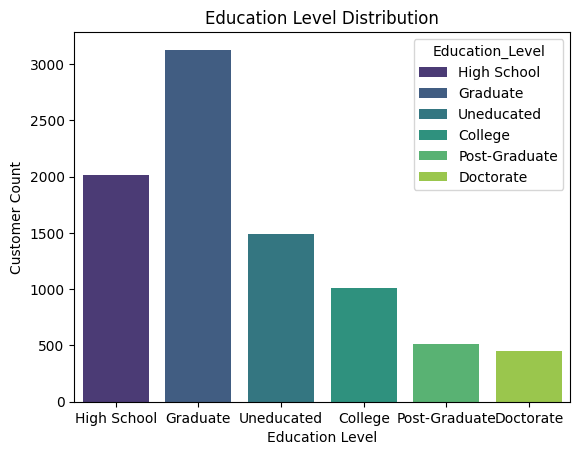

In [ ]:
#Count Plot for Level of Education Distribution
sns.countplot(data=data, x='Education_Level', hue='Education_Level', palette='viridis')

#Include title
plt.title('Education Level Distribution')

#Label x and y axes
plt.xlabel('Education Level')
plt.ylabel('Customer Count')

plt.show()

###**Observations:**
* 36.3% of customers have graduate degree
* 11.8% have a college degree
* 11.2% possess either a post-graduate or doctoral level degree
* 23.4% have a high school diploma
* 17.3% of customers are uneducated

###**3.Income Level Distribution**

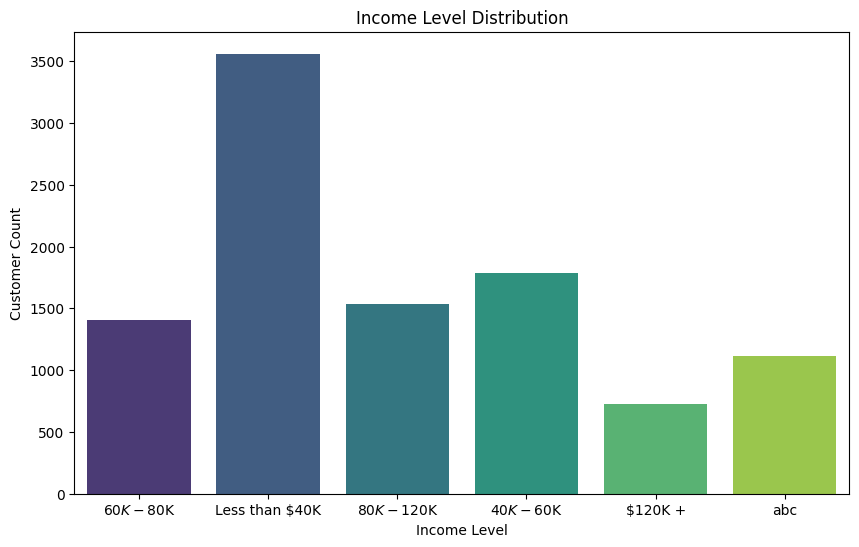

In [ ]:
#Count Plot for Level of Income Distribution

#Set figure size
plt.figure(figsize=(10, 6))

sns.countplot(data=data, x='Income_Category', hue='Income_Category', palette='viridis')

#Include title
plt.title('Income Level Distribution')

#Label x and y axes
plt.xlabel('Income Level')
plt.ylabel('Customer Count')

plt.show()

In [ ]:
#Get value counts for Income Category
data['Income_Category'].value_counts(normalize=True)

Income_Category
Less than $40K   0.352
$40K - $60K      0.177
$80K - $120K     0.152
$60K - $80K      0.138
abc              0.110
$120K +          0.072
Name: proportion, dtype: float64

###**Observations:**
* 35.2% of customers make less than \$40K per year
* 17.7% make between \$40K to \$60K per year
* 13.8% make between \$60K to \$80K per year
* 15.2% make between \$80K to \$120K per year
* 7.2% make \$120K or more per year
* 11% of customers have an "abc" or unknown level of income

###**4. How Total Amount Change between Q1 to Q4 varies by Attrition Flag**

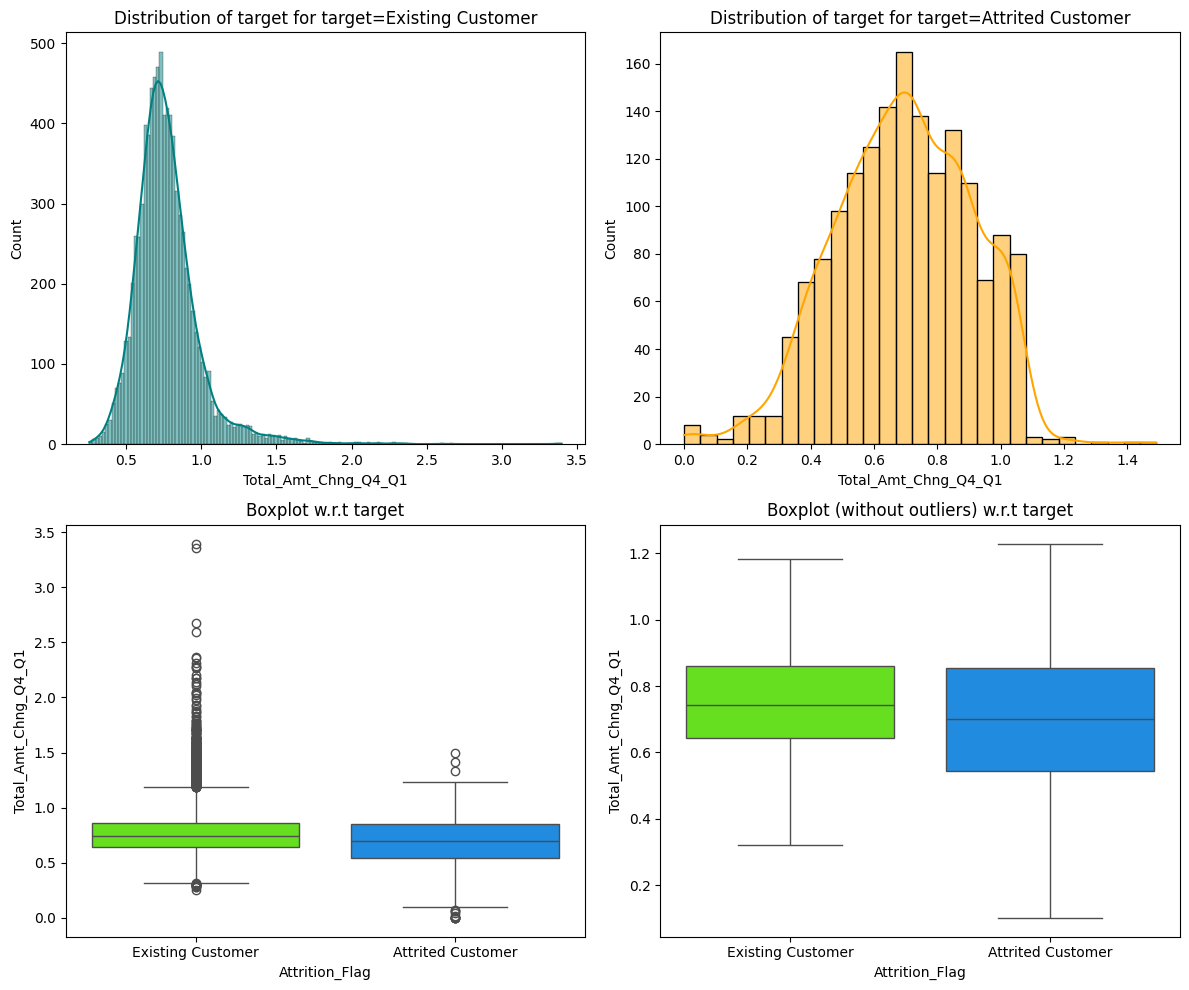

In [ ]:
#Plot Total Amount Change (Ratio of Q4 / Q1) by Attrition Flag
distribution_plot_wrt_target(data, 'Total_Amt_Chng_Q4_Q1', 'Attrition_Flag')

###**Observations:**
* Existing Customers:
  * Change in Total Amount Q1-Q4 is skewed to the right
  * Several outliers exist:
    * Ratios greater than or equal to about 1.25
    * Ratios less than or equal to about 0.25
  * When outliers are removed:
    * Median is between 0.7 and 0.8
    * Min is about 0.3 and Max is close to 1.2
* Attrited Customers:
  * Change in Total Amount Q1-Q4 is approximately normal distribution
  * Only a few outliers exist:
    * Ratios between 0 and 0.25
    * Ratios between 1.25 and 1.5
  * When outliers are removed:
    * Median is around 0.7
    * Min is close to 0.1 and Max is greater than 1.2
* We can see the majority of existing and attrited customers:
  * Spend around 70-75% of their Q1 total amounts in Q4
* Not many customers of each type spend just as much or more in Q4 than in Q1 (ratio of 1.0 or greater)
  * At least 100 existing customers
  * At least 90 customers


###**5. Customer Inactivity (Number of Months) Vary by the Attrition_Flag**

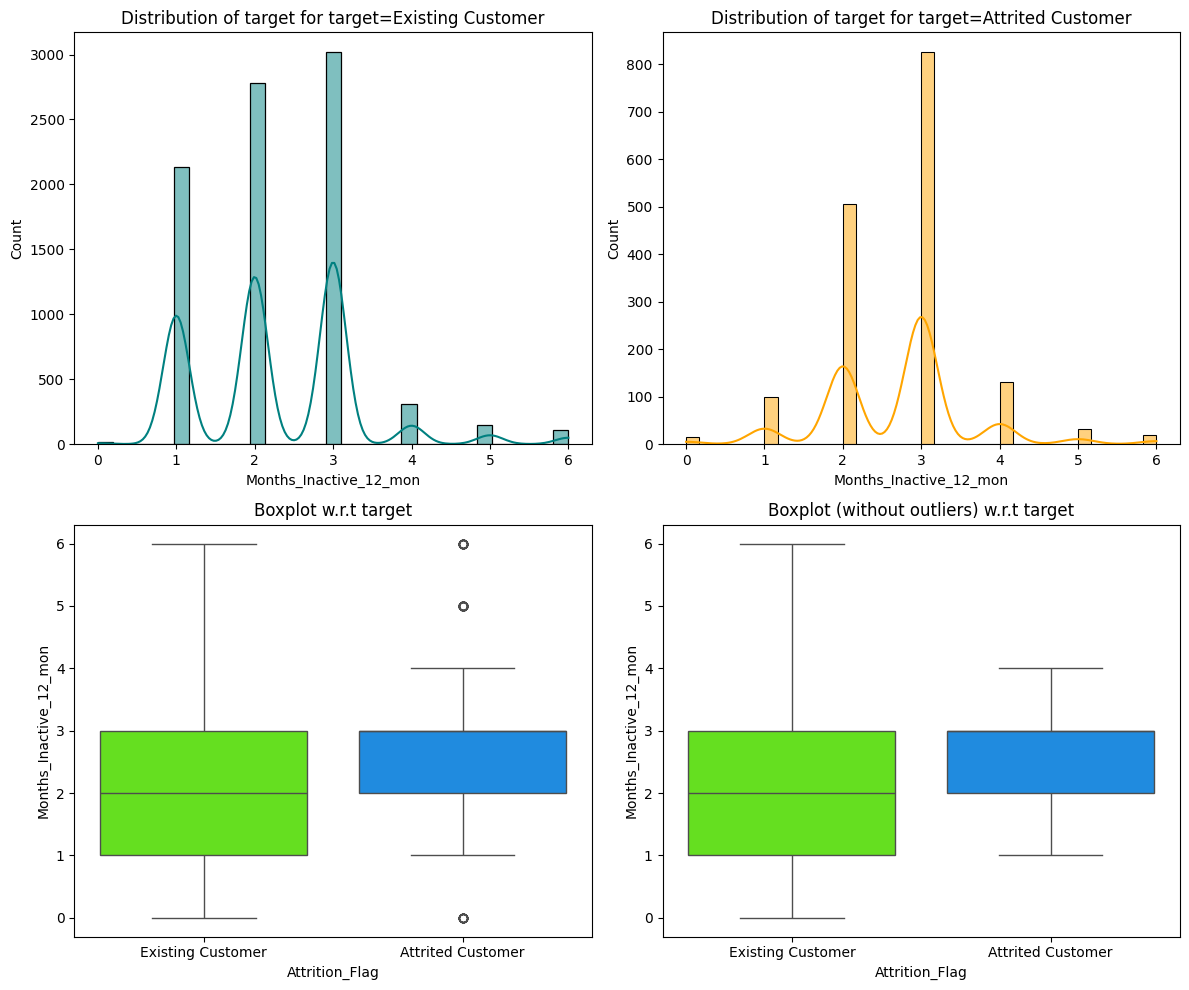

In [ ]:
#Plot distribution of Months Inactive in past 12 months by Attrition Flag
distribution_plot_wrt_target(data, 'Months_Inactive_12_mon', 'Attrition_Flag')

###**Observations:**
* Existing Customers in last 12 months:
  * Around 3,000 customers were inactive for a period of 3 months
  * Median is 2 months of inactivity
  * Min is 0 months of inactivity and Max is 6 months of inactivity
  * No outliers are present
* Attrited Customers in last 12 months:
  * Over 800 customers were inactive for a period of 3 months
  * Min is 1 month of inactivity and Max is about 5 months of inactivity
  * Median is between 2 to 3 months of inactivity
  *Outliers are present at 0 months and 5 months
  * When outliers are removed:
    * Min does not change at 1 month and Max becomes 4 months
* We can see from the histogram and box plots that more existing customers are inactive than attrited customers
  * Keep in mind that about 84% of our customer base are existing customers

###**6. Correlation of Attributes**

In [ ]:
#Create a copy of churn dataframe
data_corr = churn.copy()

#Convert columns with object data type to string
for column in data_corr.columns:
    if data_corr[column].dtype == 'object':
        data_corr[column] = data_corr[column].astype(str)

#Take the Education Level, Marital Status, and Income Category columns and fill missing values with their respective modes
data_corr['Education_Level'] = data_corr['Education_Level'].fillna(data_corr['Education_Level'].mode()[0])
data_corr['Marital_Status'] = data_corr['Marital_Status'].fillna(data_corr['Marital_Status'].mode()[0])
data_corr['Income_Category'] = data_corr['Income_Category'].fillna(data_corr['Income_Category'].mode()[0])

#Drop the Client Number column since it does not contribute to the analysis
data_corr = data_corr.drop('CLIENTNUM', axis=1)

#Convert Attrition Flag to string
data_corr['Attrition_Flag'] = data_corr['Attrition_Flag'].astype('string')

#Replace Existing Customer with 0 and Attrited Customer with 1 in the Attrition Flag column
data_corr['Attrition_Flag'] = data_corr['Attrition_Flag'].replace({'Existing Customer': '0', 'Attrited Customer': '1'})

#Convert Attrition Flag to integer
data_corr['Attrition_Flag'] = data_corr['Attrition_Flag'].astype('int64')

#Convert values of categorical columns to zeros and ones
features = pd.get_dummies(data_corr, columns=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], drop_first=True)

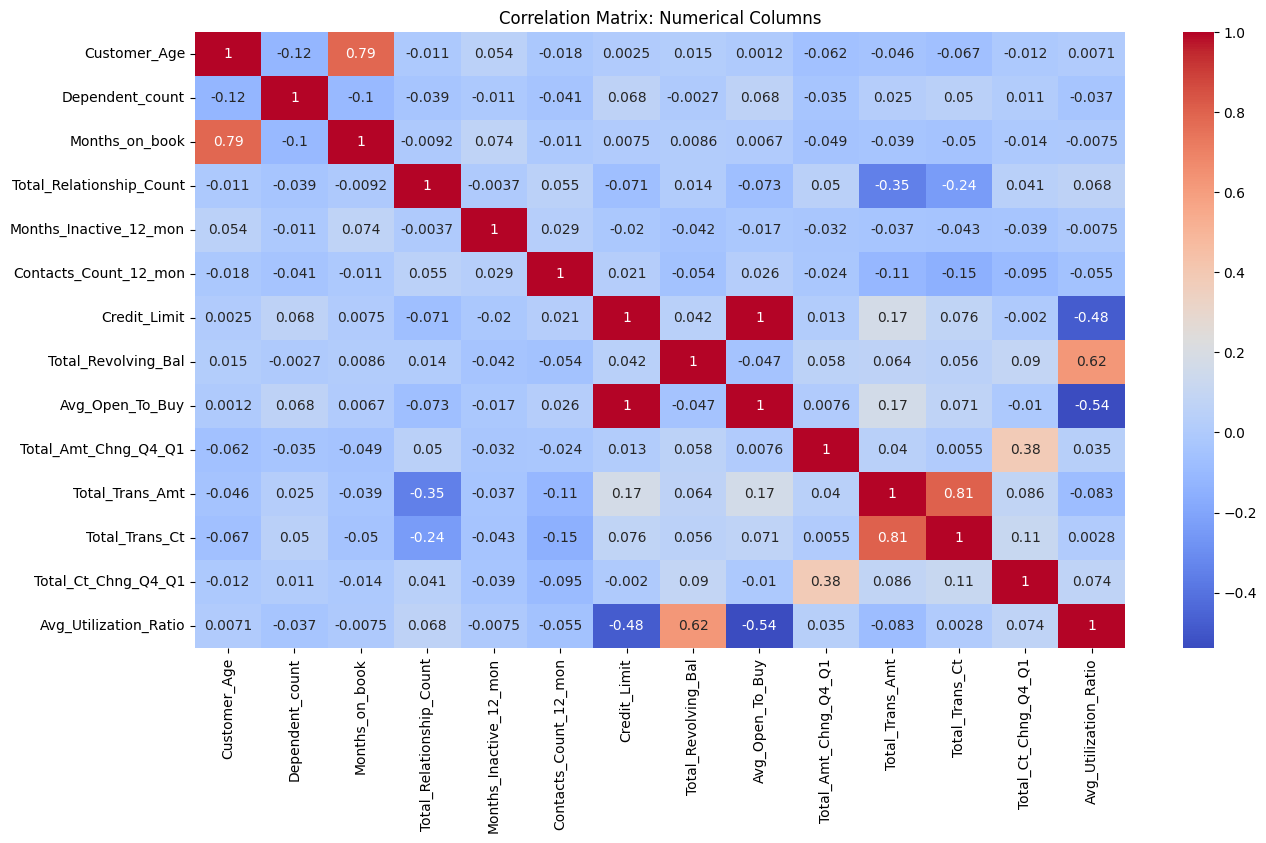

In [ ]:
#Create correlation matrix with numerical columns
numerical_corr_matrix = data_corr.drop(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], axis=1).corr()

#Set figure size
plt.figure(figsize=(15, 8))

#Plot heatmap
sns.heatmap(numerical_corr_matrix, annot=True, cmap='coolwarm')

#Include title
plt.title('Correlation Matrix: Numerical Columns')

plt.show()

###**Observations:**
* Numerical features that are strongly correlated:
  * Total_Trans_Amt and Total_Trans_Ct: 0.81
  * Customer_Age and Months_on_book: 0.79
  * These values sound reasonable:
    * Customers having a high transaction count may have a higher transaction amount
    * Older people usually have done business with the bank longer than younger people
* Numerical featuers that have a moderate correlation:
  * Total_Revolving_Bal and Avg_Utilization_Ratio: 0.62
  * Avg_Open_To_Buy and Avg_Utilization_Ratio: -0.54
  * Credit_Limit and Avg_Utilization_Ratio: -0.48
  * The first two values sound reasonable:
    * Customers with higher revolving balance will have spent more on their credit cards
    * Customers who spend less on credit cards will have more money to spend on their account
  * It is interesting to see a moderate negative correlation between credit limit and avg utilization ratio
    * Some customers who spend less on their credit cards will have a higher credit limit
    * Some customers who spend more on their credit cards will have a lower credit limit

###Univariate Analysis - Other Columns

###**Customer Age**

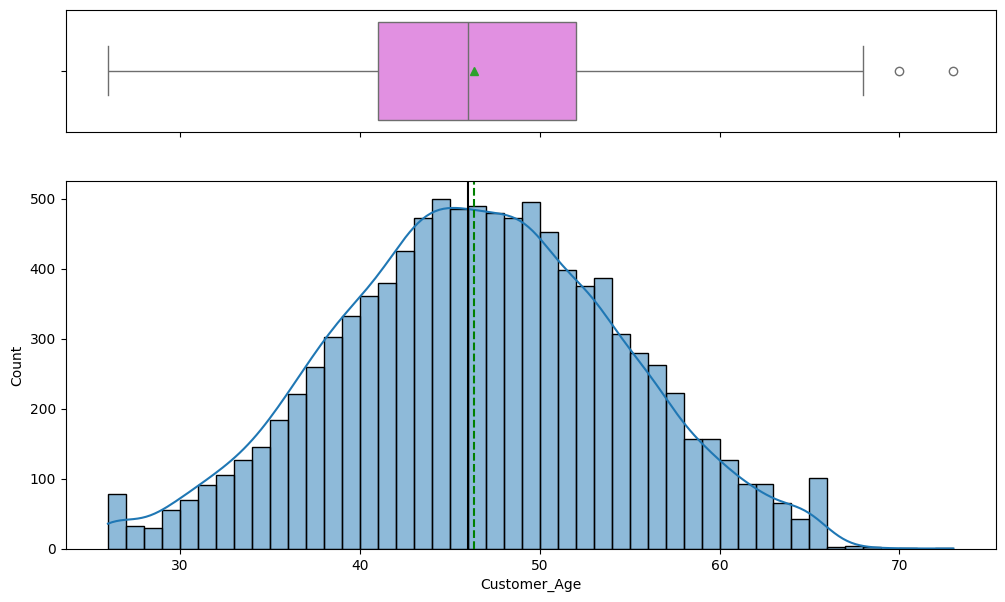

In [ ]:
#Plot histogram and box plot for Customer Age
histogram_boxplot(data, 'Customer_Age', figsize=(12, 7), kde=True)

In [ ]:
#Get mode, mean, and median
data['Customer_Age'].mode(), data['Customer_Age'].mean(), data['Customer_Age'].median()

(0    44
 Name: Customer_Age, dtype: int64,
 46.32596030413745,
 46.0)

###**Observations:**
* Customer Age has an approximate normal distribution
* Mode - 44 years
* Mean - 46.33 years
* Median - 46 years
* It appears that most of the customers are in their mid 40s
* A couple of outliers are present

###**Months on Book**

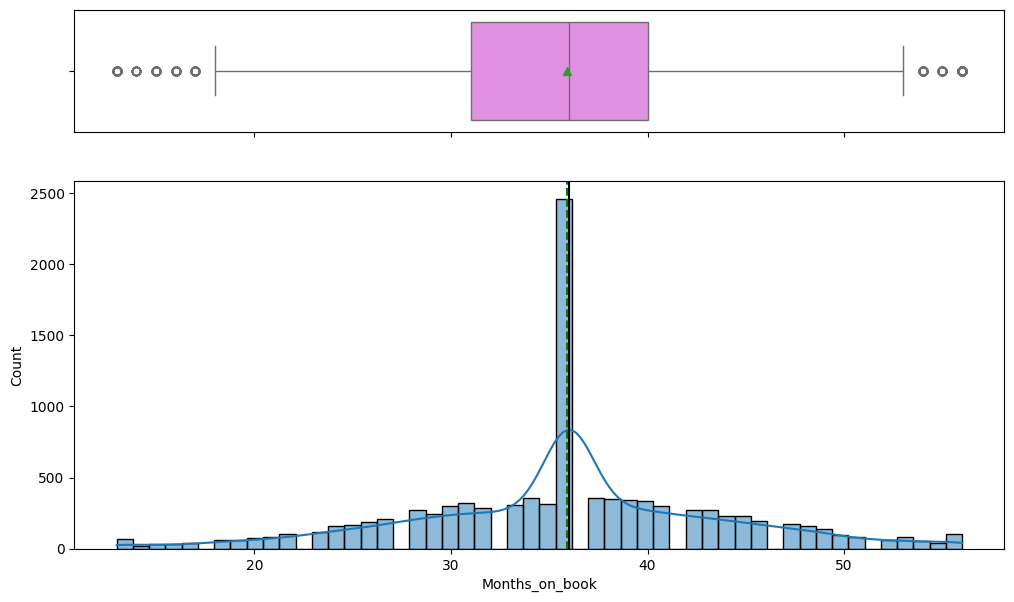

In [ ]:
#Plot histogram and box plot of Months on Book
histogram_boxplot(data, 'Months_on_book', figsize=(12, 7), kde=True)

In [ ]:
#Get mode, mean, and median
data['Months_on_book'].mode(), data['Months_on_book'].mean(), data['Months_on_book'].median()

(0    36
 Name: Months_on_book, dtype: int64,
 35.928409203120374,
 36.0)

###**Observations:**
* Distribution for Months on Book is somewhat normal
* Mode - 36 months
* Mean - 35.93 months
* Median - 36 months
* The majority of the customers on average have been banking at Thera for around 3 years

###**Total Relationship Count**

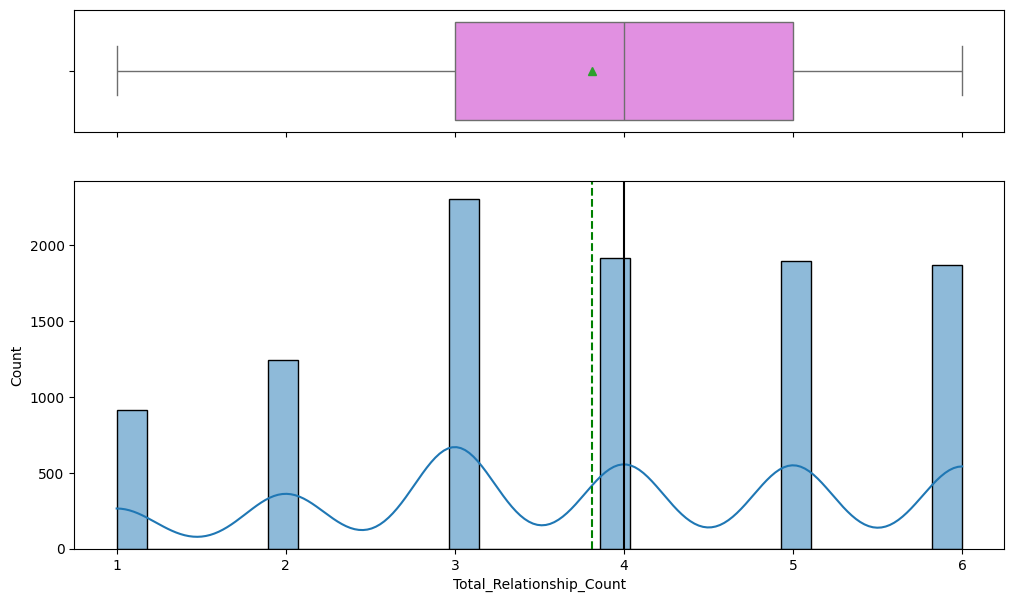

In [ ]:
#Plot histogram and box plot of Total Relationship Count
histogram_boxplot(data, 'Total_Relationship_Count', figsize=(12, 7), kde=True)

In [ ]:
#Get mode, mean, and median
data['Total_Relationship_Count'].mode(), data['Total_Relationship_Count'].mean(), data['Total_Relationship_Count'].median()

(0    3
 Name: Total_Relationship_Count, dtype: int64,
 3.8125802310654686,
 4.0)

###**Observations:**
* Total Relationship Count is left skewed
* Mode - 3 products owned
* Mean - 3.81 products owned
* Median - 4 products owned
*Most customers own about 3 products and on average, close to 4 products

###**Months Inactive (Past 12 Months)**

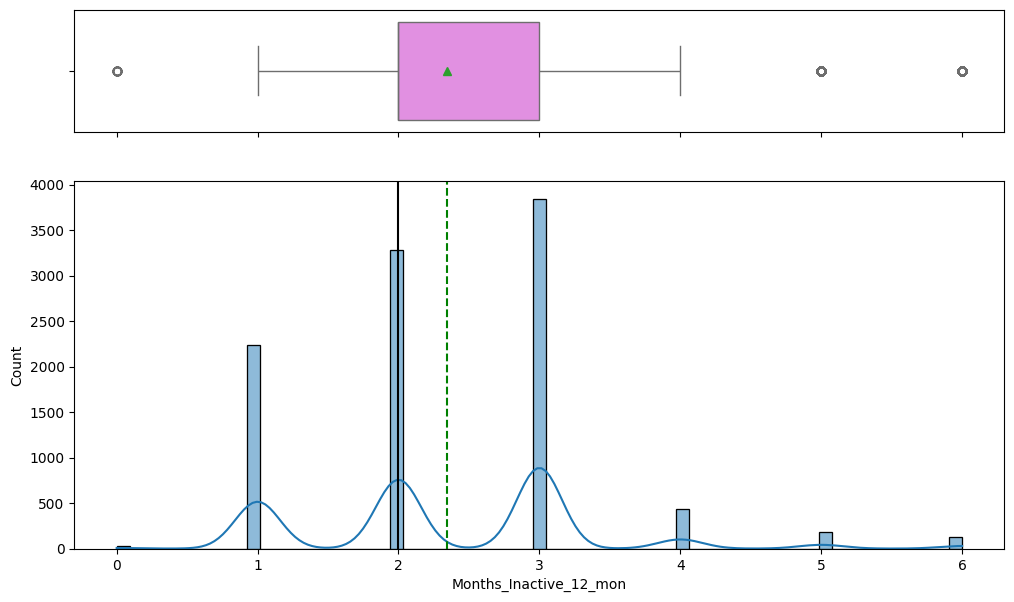

In [ ]:
#Plot histogram and box plot of Months Inactive - past 12 months
histogram_boxplot(data, 'Months_Inactive_12_mon', figsize=(12, 7), kde=True)

In [ ]:
#Get mode, mean, and median
data['Months_Inactive_12_mon'].mode(), data['Months_Inactive_12_mon'].mean(), data['Months_Inactive_12_mon'].median()

(0    3
 Name: Months_Inactive_12_mon, dtype: int64,
 2.3411671768539546,
 2.0)

###**Observations:**
* Mode - 3 months inactive
* Mean - 2.34 months inactive
* Median - 2 months inactive
* Most of the customers have a period of inactivity for 3 months
* A few outliers exist

###**Contacts Count (Past 12 months)**

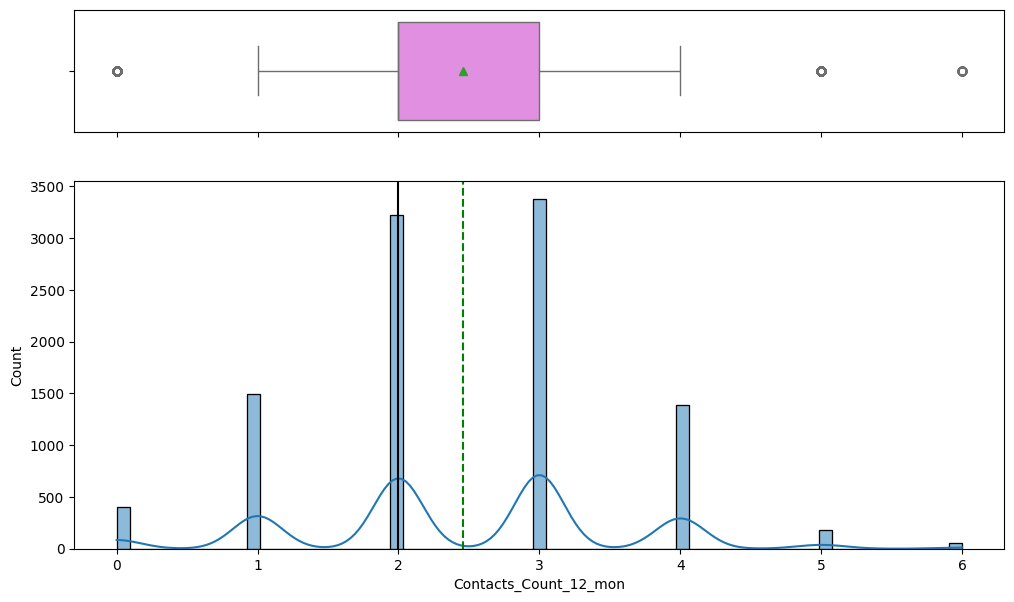

In [ ]:
#Plot histogram and box plot of Contacts Count - past 12 months
histogram_boxplot(data, 'Contacts_Count_12_mon', figsize=(12, 7), kde=True)

###**Contacts Count**

In [ ]:
#Get mode, mean, and median
data['Contacts_Count_12_mon'].mode(), data['Contacts_Count_12_mon'].mean(), data['Contacts_Count_12_mon'].median()

(0    3
 Name: Contacts_Count_12_mon, dtype: int64,
 2.4553174681544387,
 2.0)

###**Observations:**
* Contacts Count is an approximate normal distribution
* Mode - 3 contacts
* Mean - 2.45 contacts
* Median - 2 contacts
* Many customers made 2-3 calls to the bank
* A few outliers are present

###**Credit Limit**

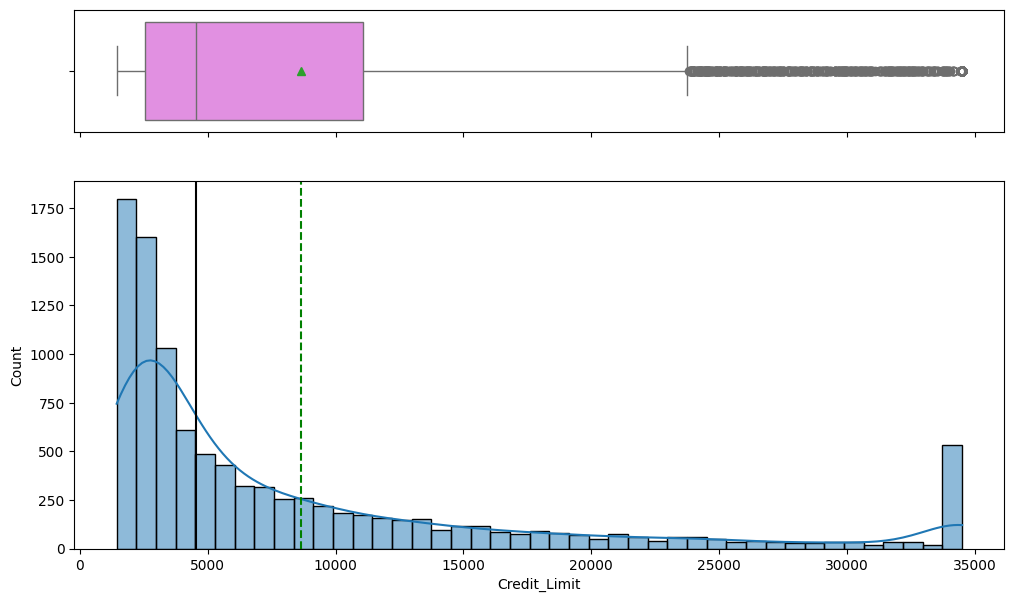

In [ ]:
#Plot histogram and box plot of Credit Limit
histogram_boxplot(data, 'Credit_Limit', figsize=(12, 7), kde=True)

In [ ]:
#Get mode, mean, and median
data['Credit_Limit'].mode(), data['Credit_Limit'].mean(), data['Credit_Limit'].median()

(0   34516.000
 Name: Credit_Limit, dtype: float64,
 8631.953698034955,
 4549.0)

###**Observations:**
* Credit Limit is highly right skewed distribution
* Mode - \$34,516.00
* Mean - \$8,631.95
* Median - \$4,549.00
* Several customers have a credit limit of less than \$5,000

###**Total Revolving Balance**

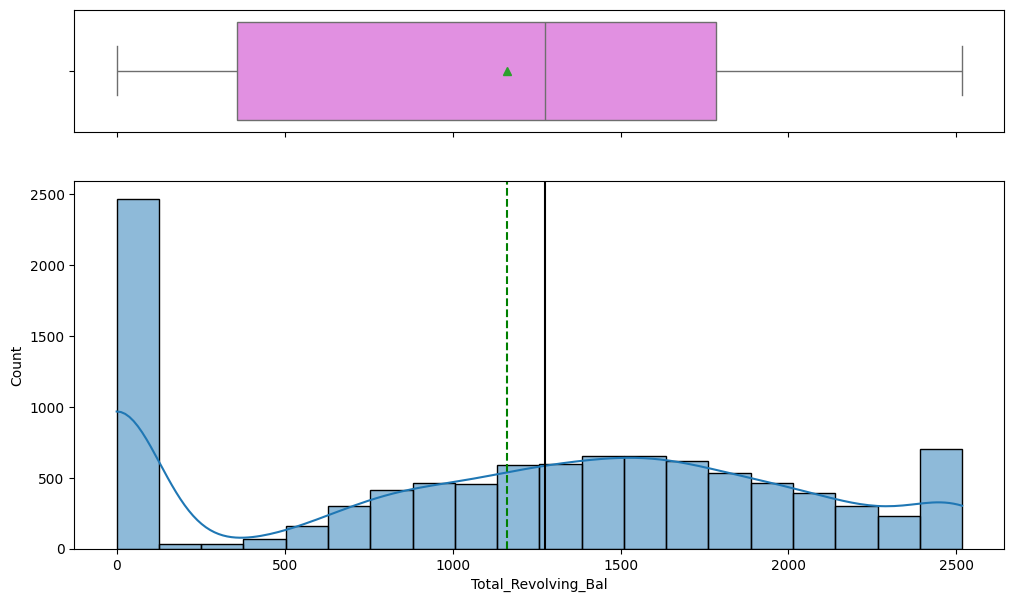

In [ ]:
#Plot histogram and box plot of Total Revolving Balance
histogram_boxplot(data, 'Total_Revolving_Bal', figsize=(12, 7), kde=True)

In [ ]:
#Get mode, mean, and median
data['Total_Revolving_Bal'].mode(), data['Total_Revolving_Bal'].mean(), data['Total_Revolving_Bal'].median()

(0    0
 Name: Total_Revolving_Bal, dtype: int64,
 1162.8140614199665,
 1276.0)

###**Observations:**
* Total Revolving Balance has somewhat of a normal distribution with left skewness
* Mode - \$0 revolving balance
* Mean - \$1,162.81 revolving balance
* Median - \$1,276.00 revolving balance
* Most customers do not have a balance carrying over to the next month
* On average, customers have a carry over balance under \$1,200

###**Average Open To Buy**

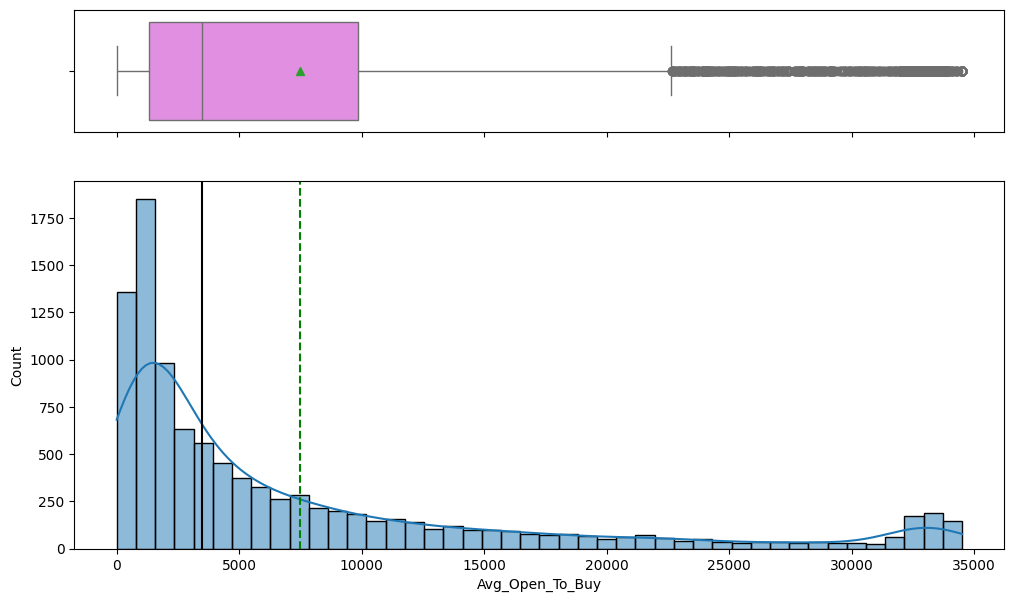

In [ ]:
#Plot Average Open To Buy
histogram_boxplot(data, 'Avg_Open_To_Buy', figsize=(12, 7), kde=True)

In [ ]:
#Get mode, mean, and median
data['Avg_Open_To_Buy'].mode(), data['Avg_Open_To_Buy'].mean(), data['Avg_Open_To_Buy'].median()

(0   1438.300
 Name: Avg_Open_To_Buy, dtype: float64,
 7469.139636614989,
 3474.0)

###**Observations:**
* Average Open to Buy is greatly right skewed
* Mode - \$1,438.30
* Mean - \$7,469.14
* Median - \$3,474.00
* Most customers have an average of under \$1,500 credit remaining on their credit card accounts
* The average credit card holder has close to \$7,500 left to spend
* Several outliers exists

###**Average Utilization Ratio**

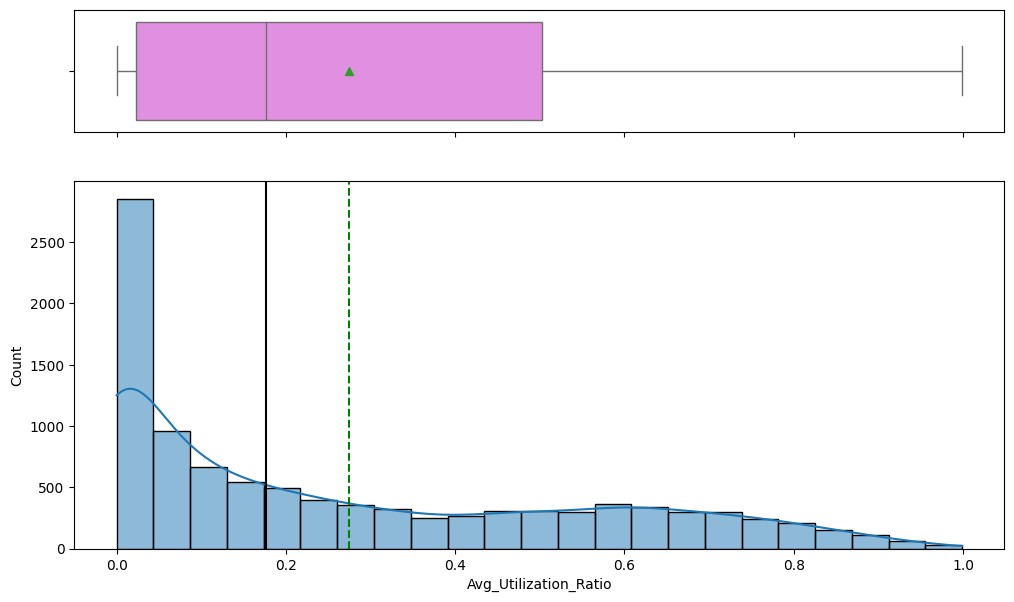

In [ ]:
#Plot histogram and box plot of Average Utilization Ratio
histogram_boxplot(data, 'Avg_Utilization_Ratio', figsize=(12, 7), kde=True)

In [ ]:
#Get mode, mean, and median
data['Avg_Utilization_Ratio'].mode(), data['Avg_Utilization_Ratio'].mean(), data['Avg_Utilization_Ratio'].median()

(0   0.000
 Name: Avg_Utilization_Ratio, dtype: float64,
 0.2748935518909845,
 0.176)

###**Observations:**
* Average Utilization Ratio is extremely right skewed
* Mode - 0%
* Mean - 27.49%
* Median - 17.6%
* Several customers have not used their credit card for purchases
* The average customer will utilize close to 30% of their credit limit
  * **Note:These customers with 30% or less utilization have a good credit score**

###**Total Transaction Count**

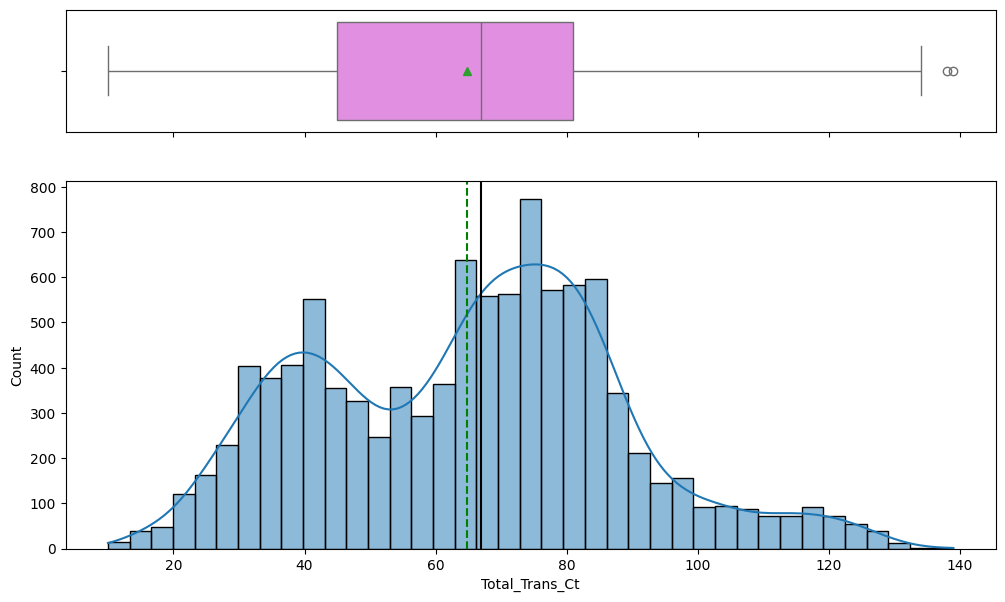

In [ ]:
#Plot histogram and box plot of Total Transaction Count
histogram_boxplot(data, 'Total_Trans_Ct', figsize=(12, 7), kde=True)

In [ ]:
#Get mode, mean, and median
data['Total_Trans_Ct'].mode(), data['Total_Trans_Ct'].mean(), data['Total_Trans_Ct'].median()

(0    81
 Name: Total_Trans_Ct, dtype: int64,
 64.85869457884863,
 67.0)

###**Observations:**
* Total Transaction Count is a left skewed distribution
* Mode - 81 transactions
* Mean - 64.86 transactions
* Median - 67 transactions
* Most customers have 81 separate purchases on their credit cards
* The average customer has about 65 separate purchases on their credit cards

###**Total Transaction Amount**

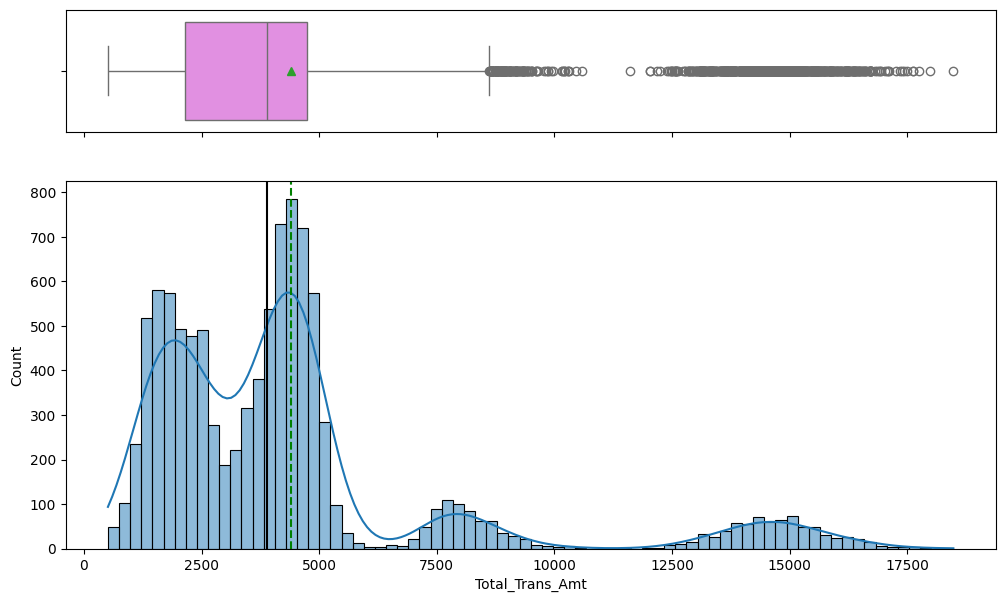

In [ ]:
#Plot histogram and box plot of Total Transaction Amount
histogram_boxplot(data, 'Total_Trans_Amt', figsize=(12, 7), kde=True)

In [ ]:
#Get mode, mean, and median
data['Total_Trans_Amt'].mode(), data['Total_Trans_Amt'].mean(), data['Total_Trans_Amt'].median()

(0    4253
 1    4509
 Name: Total_Trans_Amt, dtype: int64,
 4404.086303939963,
 3899.0)

###**Observations:**
* Total Transaction Amount is highly right skewed and bimodal distribution
* Mode - \$4,253 and \$4,509
* Mean - \$4,404.09
* Median - \$3,899.00
* Most customers spend over \$4,253 or \$4,500 on credit cards
* The average credit card holder spend more than \$4,400
* Several outliers exist

###**Total Count Change (Q4 to Q1 Ratio)**

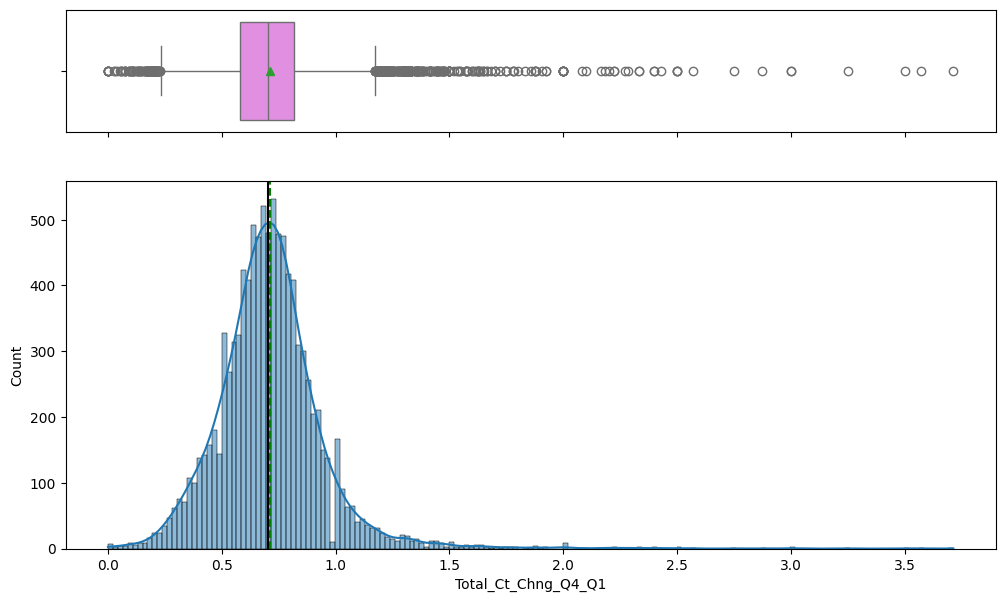

In [ ]:
#Plot histogram and box plot of Total Count Change - Q4 to Q1 Ratio
histogram_boxplot(data, 'Total_Ct_Chng_Q4_Q1', figsize=(12, 7), kde=True)

In [ ]:
#Get mode, mean, and median
data['Total_Ct_Chng_Q4_Q1'].mode(), data['Total_Ct_Chng_Q4_Q1'].mean(), data['Total_Ct_Chng_Q4_Q1'].median()

(0   0.667
 Name: Total_Ct_Chng_Q4_Q1, dtype: float64,
 0.7122223758269972,
 0.702)

###**Observations:**
* Total Count Change in Q4 to Q1 approximately normal distribution
* Mode - Q4 is 66.7% of transaction count in Q1
* Mean - Q4 is 71.22% of transaction count in Q1
* Median - Q4 is 70.2% of transaction count in Q1
* The majority of customers will have more transactions in Q4 than Q1
 * Over 500 customers have over 70% transaction count of Q1 in Q4
* Less than 100 customers have more transactions in Q4 than Q1
* Many outliers are present


###**Total Amount Change (Q4 to Q1 Ratio)**

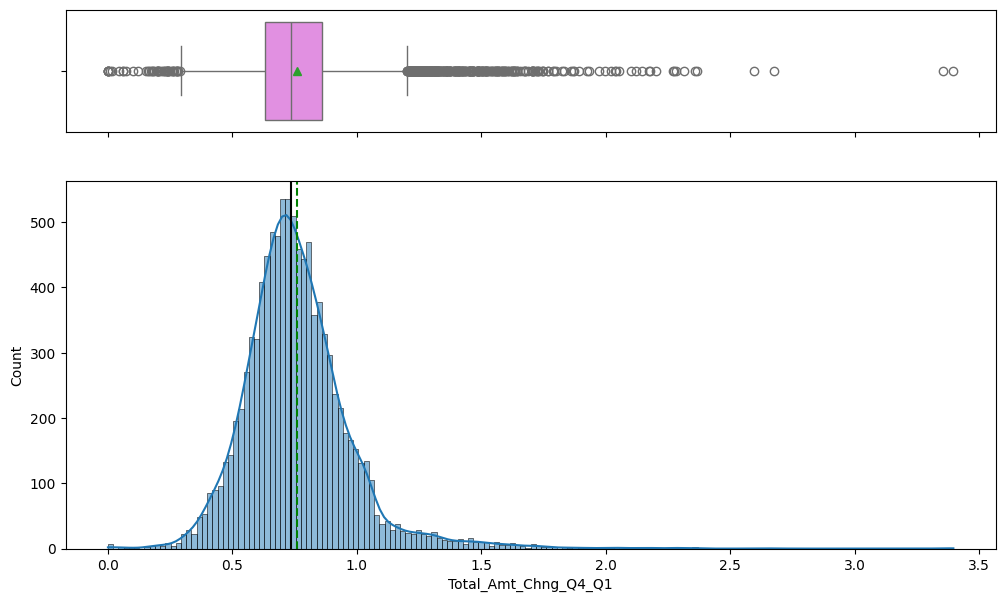

In [ ]:
#Plot histogram and box plot of Total Amount Change - Q4 to Q1 Ratio
histogram_boxplot(data, 'Total_Amt_Chng_Q4_Q1', figsize=(12, 7), kde=True)

In [ ]:
#Get mode, mean, and median
data['Total_Amt_Chng_Q4_Q1'].mode(), data['Total_Amt_Chng_Q4_Q1'].mean(), data['Total_Amt_Chng_Q4_Q1'].median()

(0   0.791
 Name: Total_Amt_Chng_Q4_Q1, dtype: float64,
 0.7599406536980349,
 0.736)

###**Observations:**
* Total Amount Change in Q4 to Q1 has a relatively normal distribution
  * Similar to Total Count Change in Q4 to Q1
  * Recall that a strong correlation exists between Total Count Change and Total Amount Change of 0.81
* Mode - 79.1% of Q1 amount is spent in Q4
* Mean - 75.99% of Q1 amount is spent in Q4
* Median - 73.6% of Q1 amount is spent in Q4
* Most customers in Q4 spend close to 80% of the amount in Q1
* Several outliers are present

###**Dependent Count**

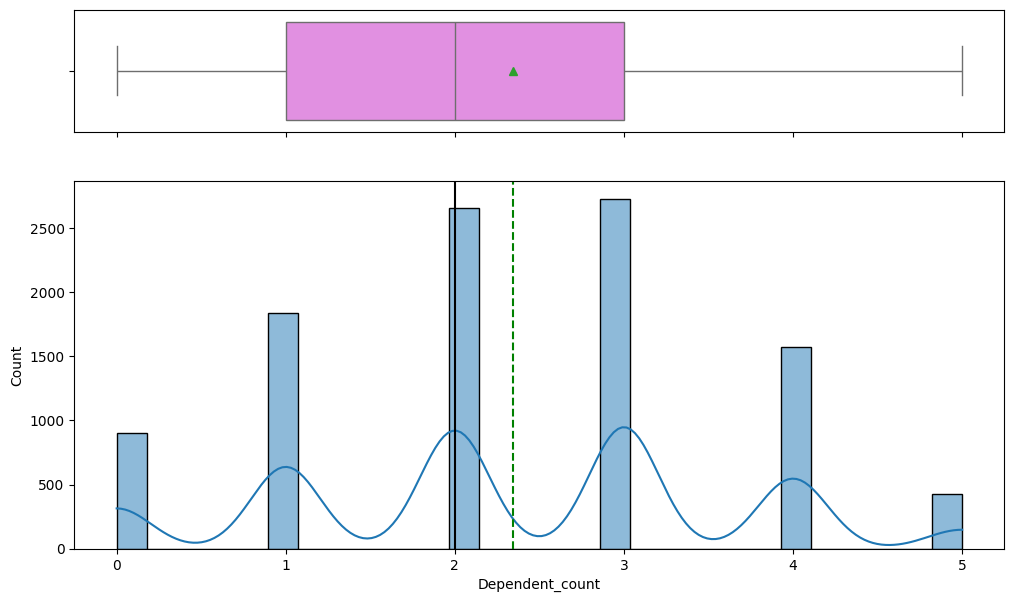

In [ ]:
#Plot histogram and box plot of Dependent Count
histogram_boxplot(data, 'Dependent_count', figsize=(12, 7), kde=True)

In [ ]:
#Get mode, mean, and median
data['Dependent_count'].mode(), data['Dependent_count'].mean(), data['Dependent_count'].median()

(0    3
 Name: Dependent_count, dtype: int64,
 2.3462032191172115,
 2.0)

###**Observations:**
* Box plot shows that Dependent Count is right-skewed
* Mode - 3 dependents
* Mean - 2.35 dependents
* Median - 2 dependents
* Several customers have 3 dependents
* The average customer has at least 2 dependents

###**Card Category**

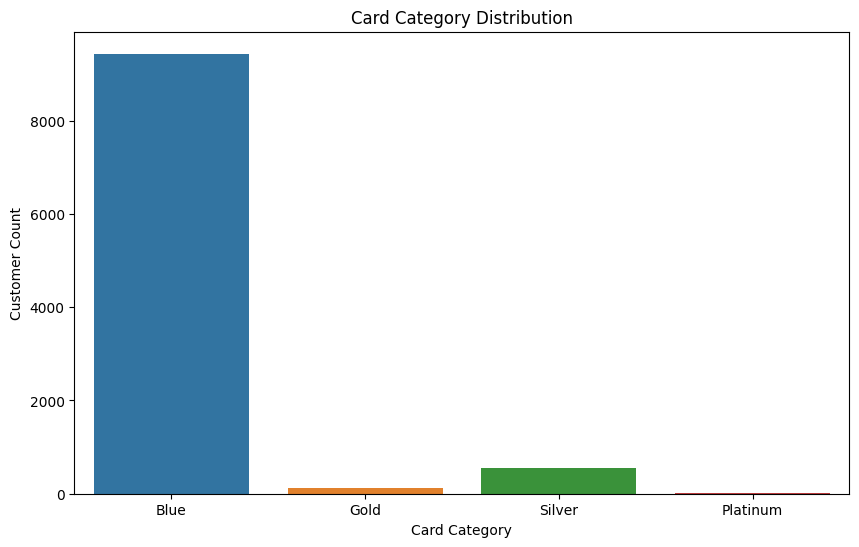

In [ ]:
#Set figure size
plt.figure(figsize=(10, 6))

#Count Plot for Card Category
sns.countplot(data=data, x='Card_Category', hue='Card_Category')

#Include title
plt.title('Card Category Distribution')

#Label x and y axes
plt.xlabel('Card Category')
plt.ylabel('Customer Count')

plt.show()

In [ ]:
#Get value counts for each card type
data['Card_Category'].value_counts(normalize=True)

Card_Category
Blue       0.932
Silver     0.055
Gold       0.011
Platinum   0.002
Name: proportion, dtype: float64

###**Observations:**
* 93.2% of customers own a Blue credit card
* Next comes the 6.6% of customers either owning a Silver or Gold credit card
* Only 0.2% of customers own a Platinum Credit Card

###**Gender**

Text(0, 0.5, 'Customer Count')

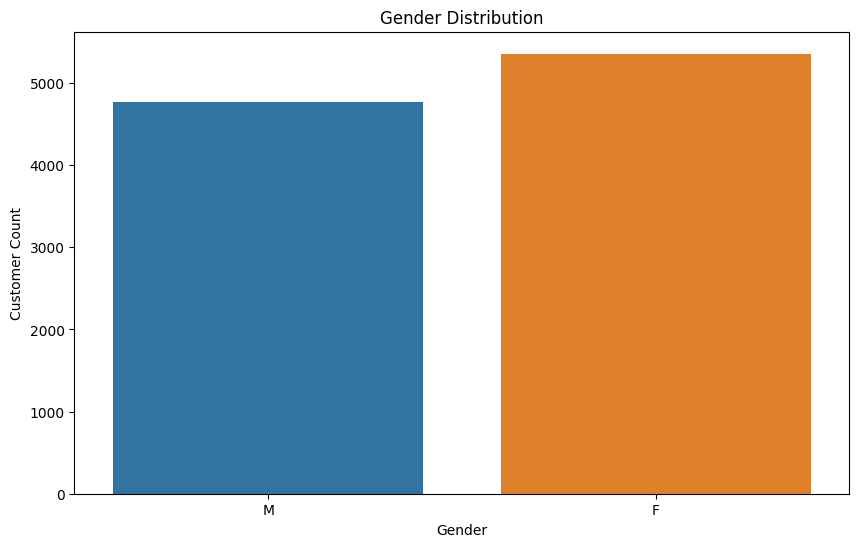

In [ ]:
#Set figure size
plt.figure(figsize=(10, 6))

#Count Plot for Card Category
sns.countplot(data=data, x='Gender', hue='Gender')

#Include title
plt.title('Gender Distribution')

#Label x and y axes
plt.xlabel('Gender')
plt.ylabel('Customer Count')

In [ ]:
#Get value counts for Gender
data['Gender'].value_counts(normalize=True)

Gender
F   0.529
M   0.471
Name: proportion, dtype: float64

###**Observations:**
* There are more female customers than male customers
  * Female - 52.9%
  * Male - 47.1%

###**Marital Status**

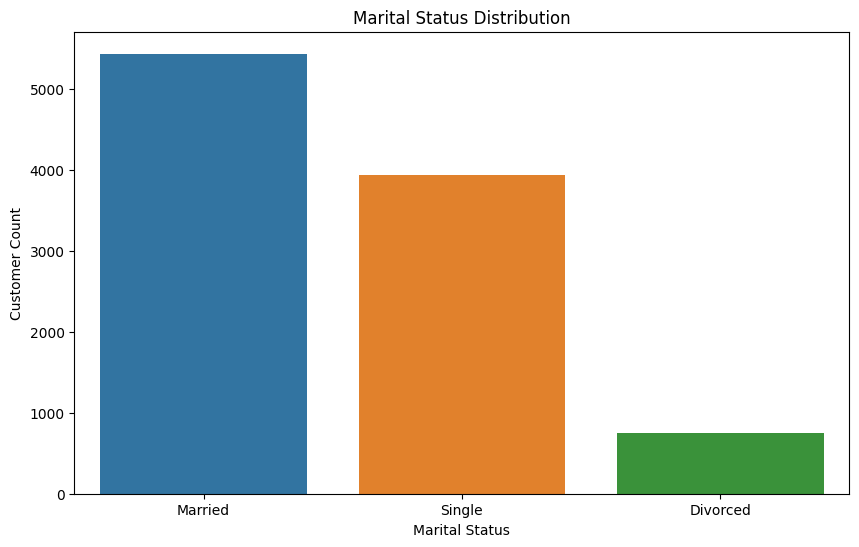

In [ ]:
#Make a copy of original dataframe
status = churn.copy()

#Get the mode for marital status to impute missing values
marital_status_mode = status['Marital_Status'].mode()[0]

#Impute unknown values with mode martial status
status['Marital_Status'] = status['Marital_Status'].fillna(marital_status_mode)

#Set figure size
plt.figure(figsize=(10, 6))

#Count Plot for Marital Status
sns.countplot(data=status, x='Marital_Status', hue='Marital_Status')

#Include title
plt.title('Marital Status Distribution')

#Label x and y axes
plt.xlabel('Marital Status')
plt.ylabel('Customer Count')

plt.show()

In [ ]:
#Get value counts excluding missing values
data[~data['Marital_Status'].isnull()]['Marital_Status'].value_counts(normalize=True)

Marital_Status
Married    0.500
Single     0.420
Divorced   0.080
Name: proportion, dtype: float64

In [ ]:
#Get value counts after imputation
status['Marital_Status'].value_counts(normalize=True)

Marital_Status
Married    0.537
Single     0.389
Divorced   0.074
Name: proportion, dtype: float64

###**Observations:**
* If we exclude the customers with a missing marital status, we have:
  * Married - 50%
  * Single - 42%
  * Divorced - 8%
* After imputation of the mode martial status of "Married", we get:
  * Married - 53.7%
  * Single - 38.9%
  * Divorced - 7.4%
* In either case, we can see that:
  * At least half of the customers are married
  * Close to 40% of the customers are single
  * About 7-8% of the customers are divorced

###**Attrition Flag**

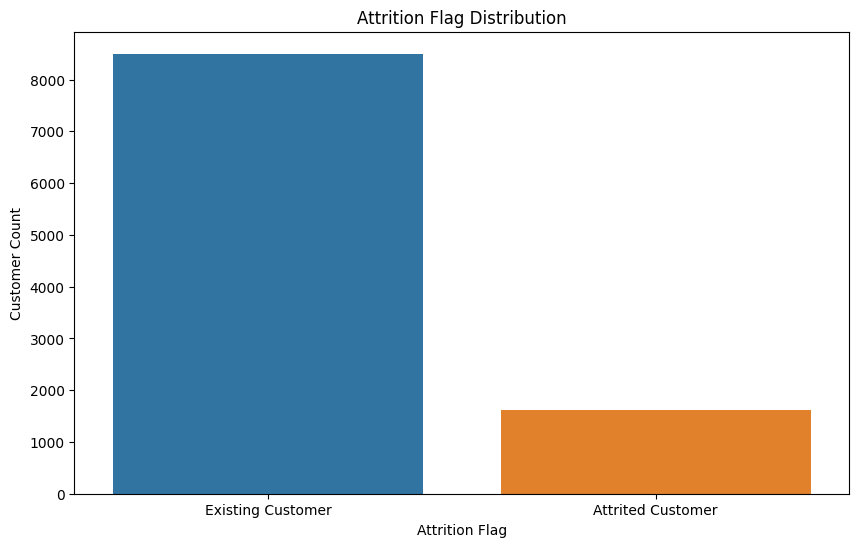

In [ ]:
#Set figure size
plt.figure(figsize=(10, 6))

#Count Plot for Attrition Flag
sns.countplot(data=data, x='Attrition_Flag', hue='Attrition_Flag')

#Include title
plt.title('Attrition Flag Distribution')

#Label x and y axes
plt.xlabel('Attrition Flag')
plt.ylabel('Customer Count')

plt.show()

In [ ]:
#Get value counts for Attrition Flag
data['Attrition_Flag'].value_counts(normalize=True)

Attrition_Flag
Existing Customer   0.839
Attrited Customer   0.161
Name: proportion, dtype: float64

###**Observations:**
* 83.9% are existing customers
* 16.1% are attrited customers

###Bi-Variate Analysis: Relationship Between Features and Attrition Flag (Target)

###**Customer Age by Attrition Flag**

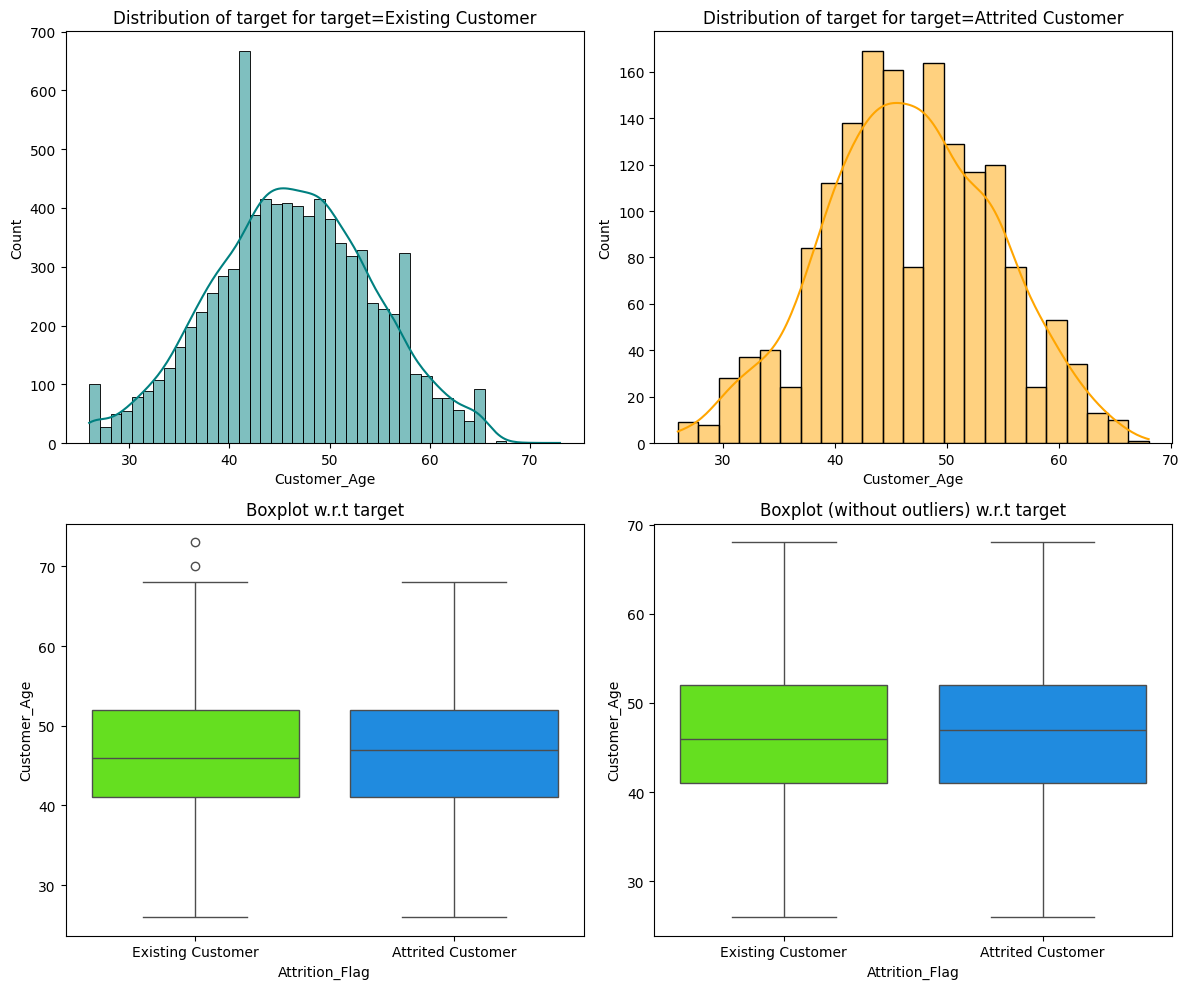

In [ ]:
#Histogram and box plots of Customer Age by Attrition Flag
distribution_plot_wrt_target(data, 'Customer_Age', 'Attrition_Flag')

###**Observations:**
* The customer age distributions for both types of customers are relatively normal
* Most of the existing  and attrited customers are between the ages of 40 to 50
* Customer age has a couple of outliers for existing customers
  * Close to or slightly greater than 70 years of age


###**Gender by Attrition Flag**

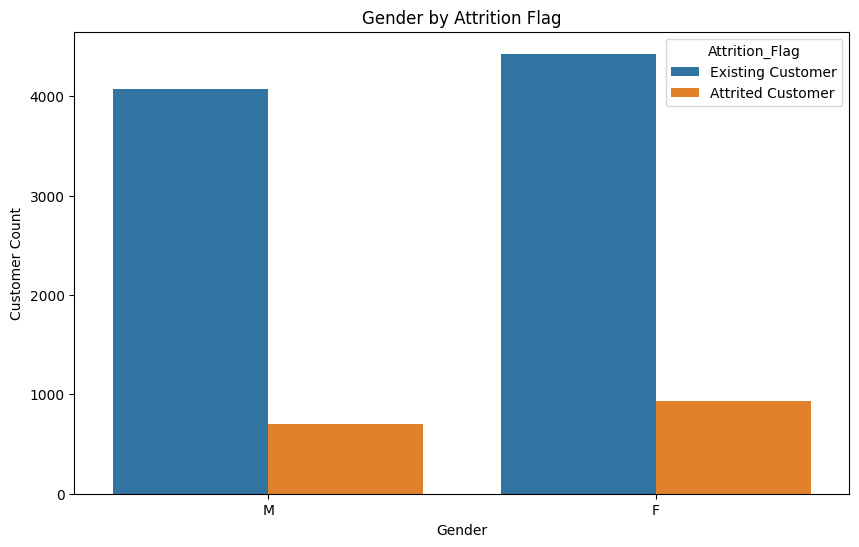

In [ ]:
#Set figure size
plt.figure(figsize=(10, 6))

#Count Plot for Gender by Attrition Flag
sns.countplot(data=data, x='Gender', hue='Attrition_Flag')

#Include title
plt.title('Gender by Attrition Flag')

#Label x and y axes
plt.xlabel('Gender')
plt.ylabel('Customer Count')

plt.show()

In [ ]:
#Gender count by Attrition Flag
data.groupby('Gender')['Attrition_Flag'].value_counts(normalize=True)

Gender  Attrition_Flag   
F       Existing Customer   0.826
        Attrited Customer   0.174
M       Existing Customer   0.854
        Attrited Customer   0.146
Name: proportion, dtype: float64

###**Observations:**
* Here is a breakdown of the gender population by Attrition Flag:
  * Female:
    * Existing Customers - 82.6%
    * Attrited Customers - 17.4%
  * Male:
    * Existing Customers - 85.4%
    * Attrited Customers - 14.6%
* There are more female attrited customers than male attrtied customers
* Plus there are more existing female customers than male existing customers
* This makes sense because we have more female customers than male customers at the bank

###**Credit Limit by Attrition Flag**

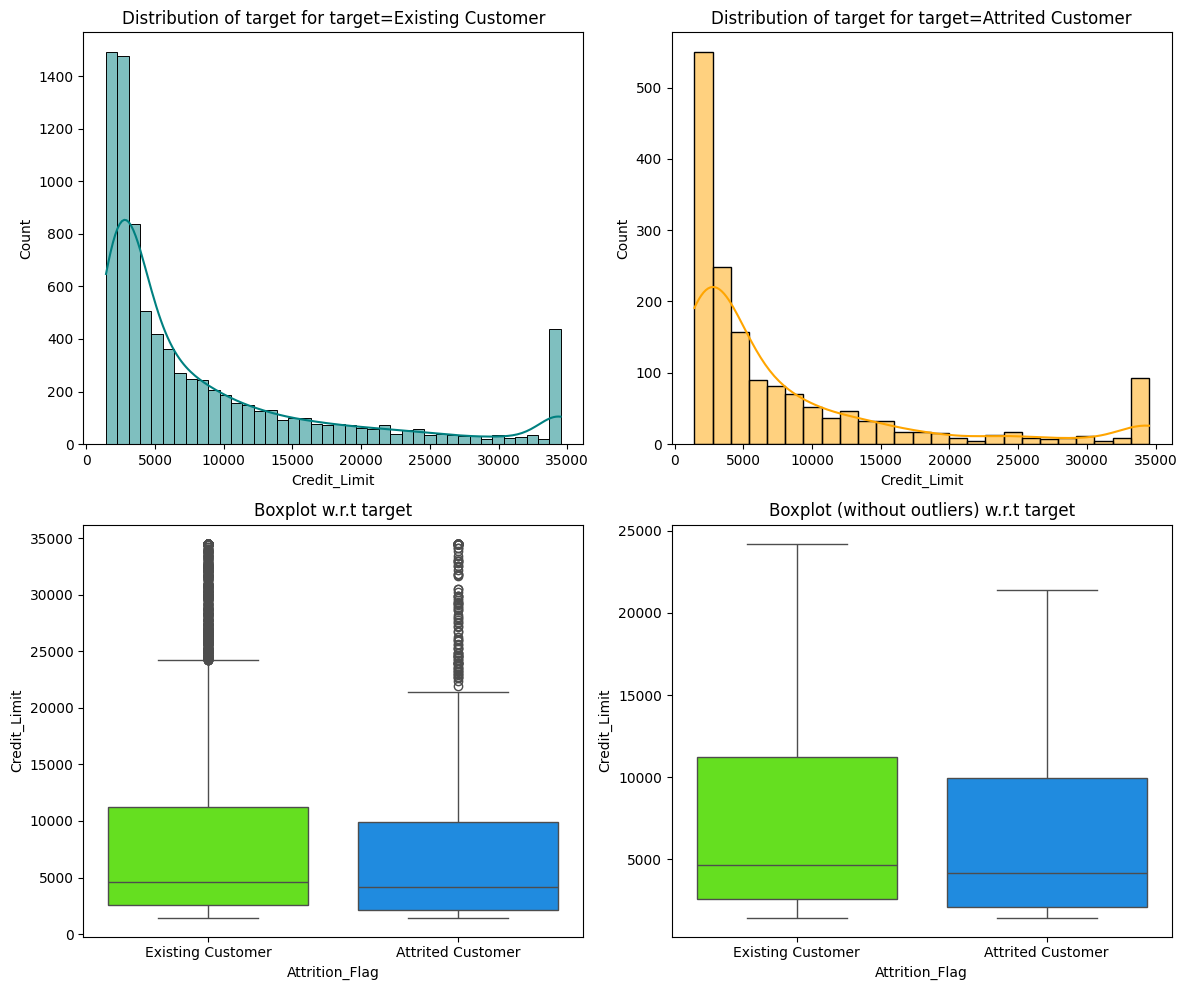

In [ ]:
#Histogram and box plots of Credit Limit by Attrition Flag
distribution_plot_wrt_target(data, 'Credit_Limit', 'Attrition_Flag')

###**Observations:**
* Credit Limit for existing and attrited customers both have a right-skewed distribution
* Both types of customers have several outliers for credit limit
* Existing customers tend to have a higher credit limit than attrited customers with and without outliers

###**Education Level by Attrition Flag**

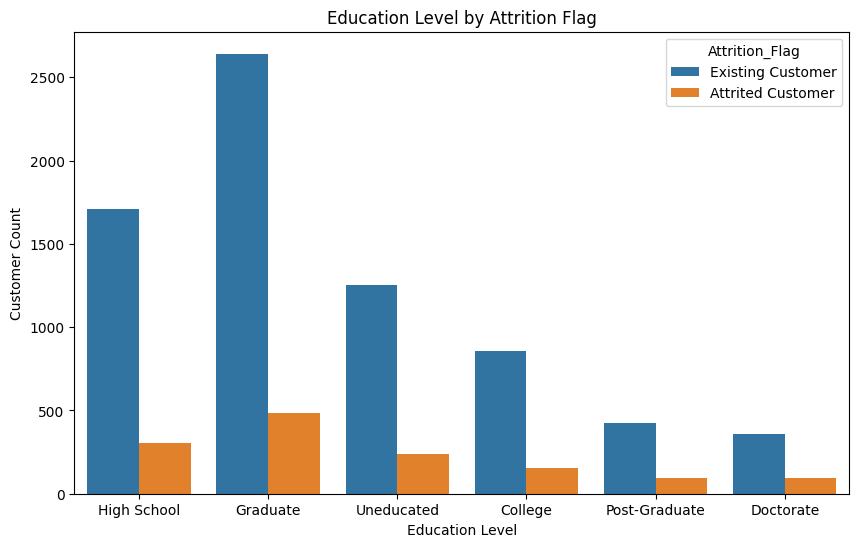

In [ ]:
#Set figure size
plt.figure(figsize=(10, 6))

#Count Plot for Card Category by Attrition Flag
sns.countplot(data=data, x='Education_Level', hue='Attrition_Flag')

#Include title
plt.title('Education Level by Attrition Flag')

#Label x and y axes
plt.xlabel('Education Level')
plt.ylabel('Customer Count')

plt.show()

In [ ]:
#Get value counts for Education Level by Attrition Flag
data.groupby('Education_Level')['Attrition_Flag'].value_counts(normalize=True)

Education_Level  Attrition_Flag   
College          Existing Customer   0.848
                 Attrited Customer   0.152
Doctorate        Existing Customer   0.789
                 Attrited Customer   0.211
Graduate         Existing Customer   0.844
                 Attrited Customer   0.156
High School      Existing Customer   0.848
                 Attrited Customer   0.152
Post-Graduate    Existing Customer   0.822
                 Attrited Customer   0.178
Uneducated       Existing Customer   0.841
                 Attrited Customer   0.159
Name: proportion, dtype: float64

###**Observations:**
* Here is the breakdown of Education Level by Attrition Flag:
  * College:
     * Existing Customer - 84.8%
     * Attrited Customer - 15.2%
  * Doctorate:
    * Existing Customer - 78.9%
    * Attrited Customer - 21.1%
  * Graduate:
    * Existing Customer - 84.4%
    * Attrited Customer - 15.6%
  * High School:
    * Existing Customer - 84.8%
    * Attrited Customer - 15.2%
  * Post-Graduate:
    * Existing Customer - 82.2%
    * Attrited Customer - 17.8%
  * Uneducated:
    * Existing Customer - 84.1%
    * Attrited Customer - 15.9%
* Most of the existing customers and attrited customers have graduate degrees
* The least amount of existing customers and attrited customers have doctorate or post-graduate degrees

###**Marital Status by Attrition Flag**

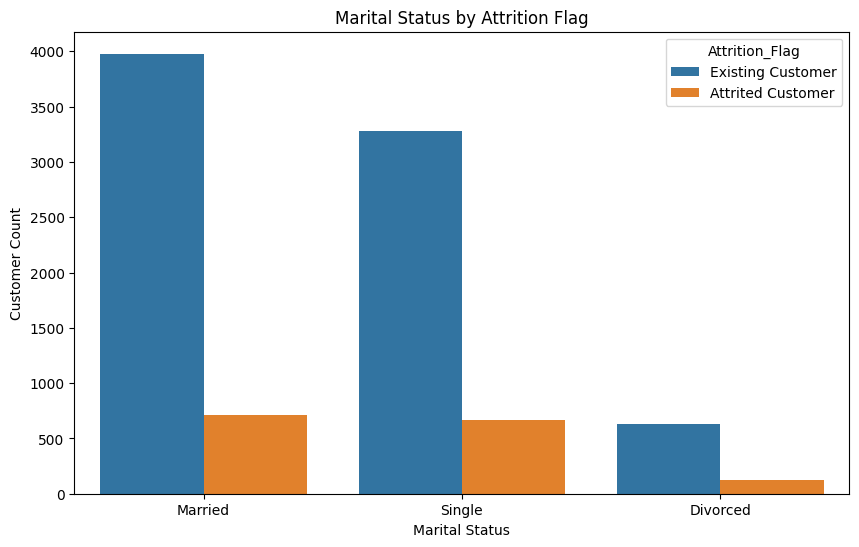

In [ ]:
#Filter out customers who are missing a marital status
status = data[~data['Marital_Status'].isnull()]

#Set figure size
plt.figure(figsize=(10, 6))

#Count Plot for Marital Status by Attrition Flag
sns.countplot(data=status, x='Marital_Status', hue='Attrition_Flag')

#Include title
plt.title('Marital Status by Attrition Flag')

#Label x and y axes
plt.xlabel('Marital Status')
plt.ylabel('Customer Count')

plt.show()

In [ ]:
#Get value counts for each marital status by attrition flag
data.groupby('Marital_Status')['Attrition_Flag'].value_counts(normalize=True)

Marital_Status  Attrition_Flag   
Divorced        Existing Customer   0.838
                Attrited Customer   0.162
Married         Existing Customer   0.849
                Attrited Customer   0.151
Single          Existing Customer   0.831
                Attrited Customer   0.169
Name: proportion, dtype: float64

###**Observations:**
* Here is a breakdown of the marital status by attrition flag:
  * Divorced:
    * Existing Customers: 83.8%
    * Attrited Customers: 16.2%
  * Married:
    * Existing Customers: 84.9%
    * Attrited Customers: 15.1%
  * Single:
    * Existing Customers: 83.1%
    * Attrited Customers: 16.9%
* Most of the existing and attrited customers are married
* The fewest number of existing and attrited customers are divorced


###**Contacts Count (Past 12 Months) by Attrition**

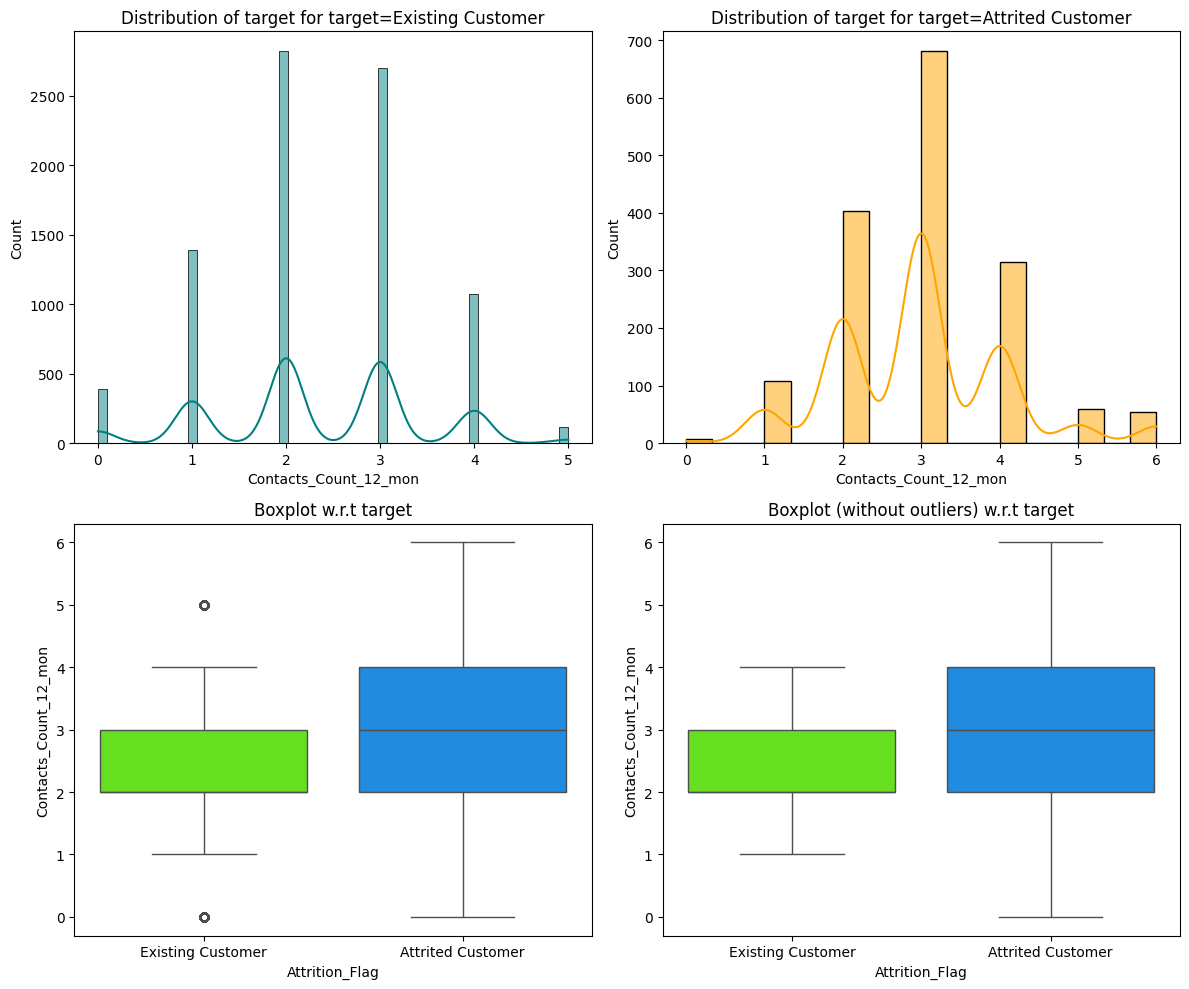

In [ ]:
#Histogram and box plots of Contacts Count by Attrition Flag
distribution_plot_wrt_target(data, 'Contacts_Count_12_mon', 'Attrition_Flag')

###**Observations:**
* Most existing customers made 2 to 3 calls to the bank in the past year
* Most attrited customers made 2 calls to the bank in the past year
* No contact count outliers exist for attrited customers
* There are a couple of contact count outliers for existing customers
* Attrited customers have made more calls to the bank than existing customers

###**Average Utilization Ratio by Attrition Flag**

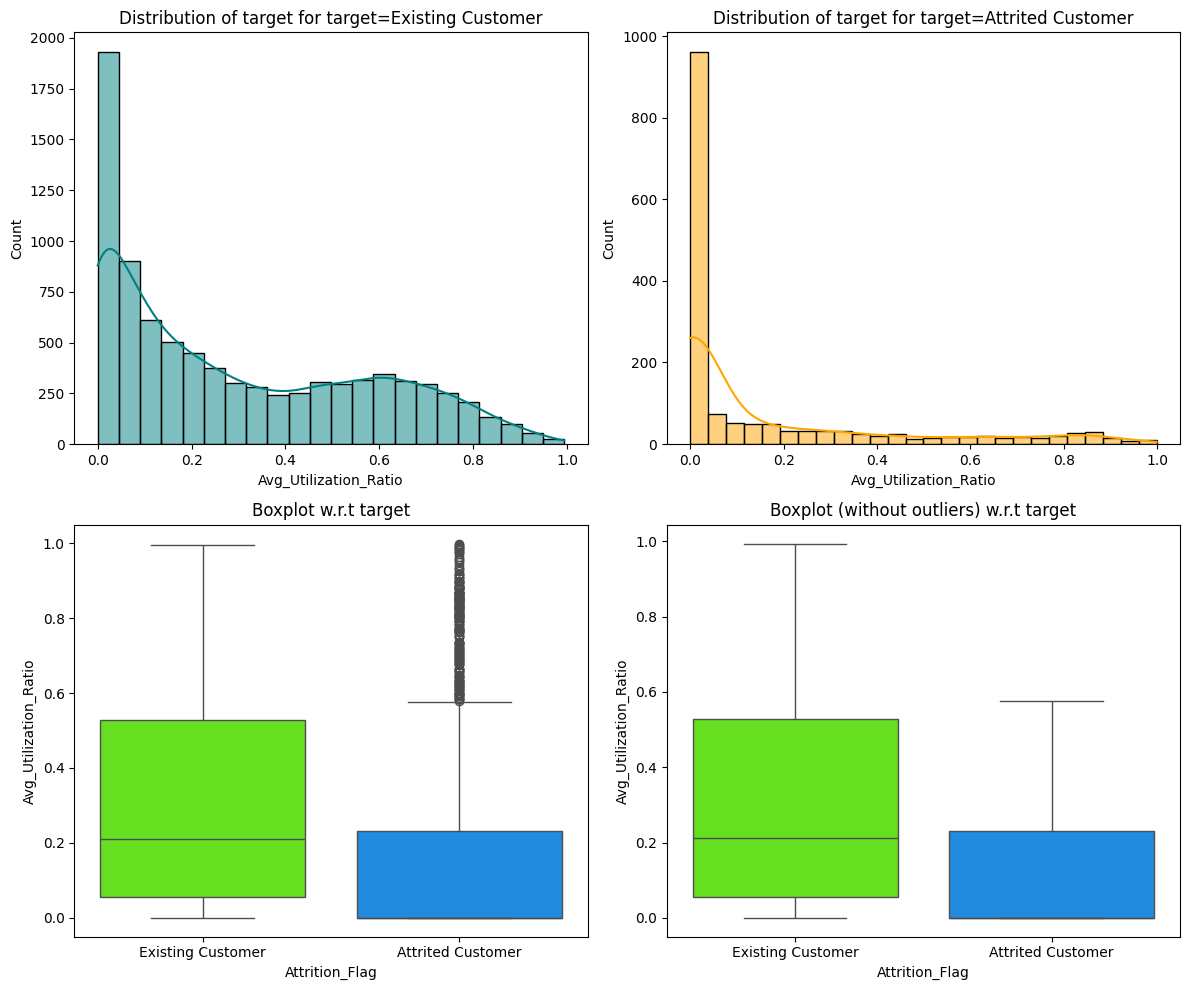

In [ ]:
#Histogram and box plots of Average Utilization Ratio by Attrition Flag
distribution_plot_wrt_target(data, 'Avg_Utilization_Ratio', 'Attrition_Flag')

###**Observations:**
* Average Utilization Ratio for both existing and attrited customers have a right-skewed distribution
* Existing customers tend to have a higher average utilization ratio than attrited customers
* Several average utilization outliers exist in attrited customers

###**Total Revolving Balance by Attrition Flag**

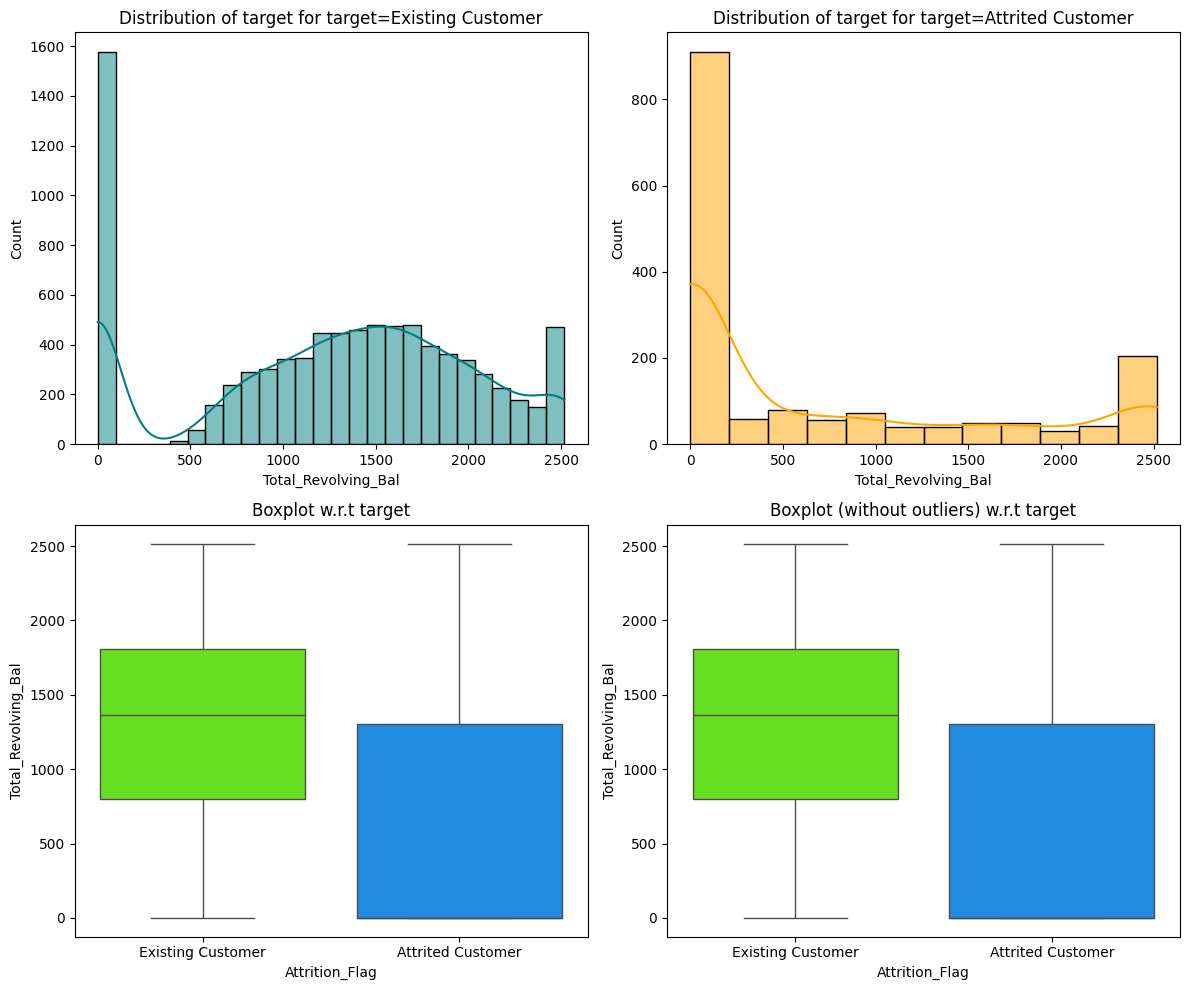

In [ ]:
#Histogram and box plots of Total Revolving Balance by Attrition Flag
distribution_plot_wrt_target(data, 'Total_Revolving_Bal', 'Attrition_Flag')

###**Observations:**
* Total Revolving Balance Distribution Shapes:
  * Existing Customers - somewhat normal
  * Attrited Customers - somewhat uniform
* Existing customers tend to have a higher total revolving balance than attrited customers
* Most of the existing and attrited customers have around a \$0 revolving balance
* No total revolving balance outliers have been detected for either customer type


###**Dependent Count by Attrition Flag**

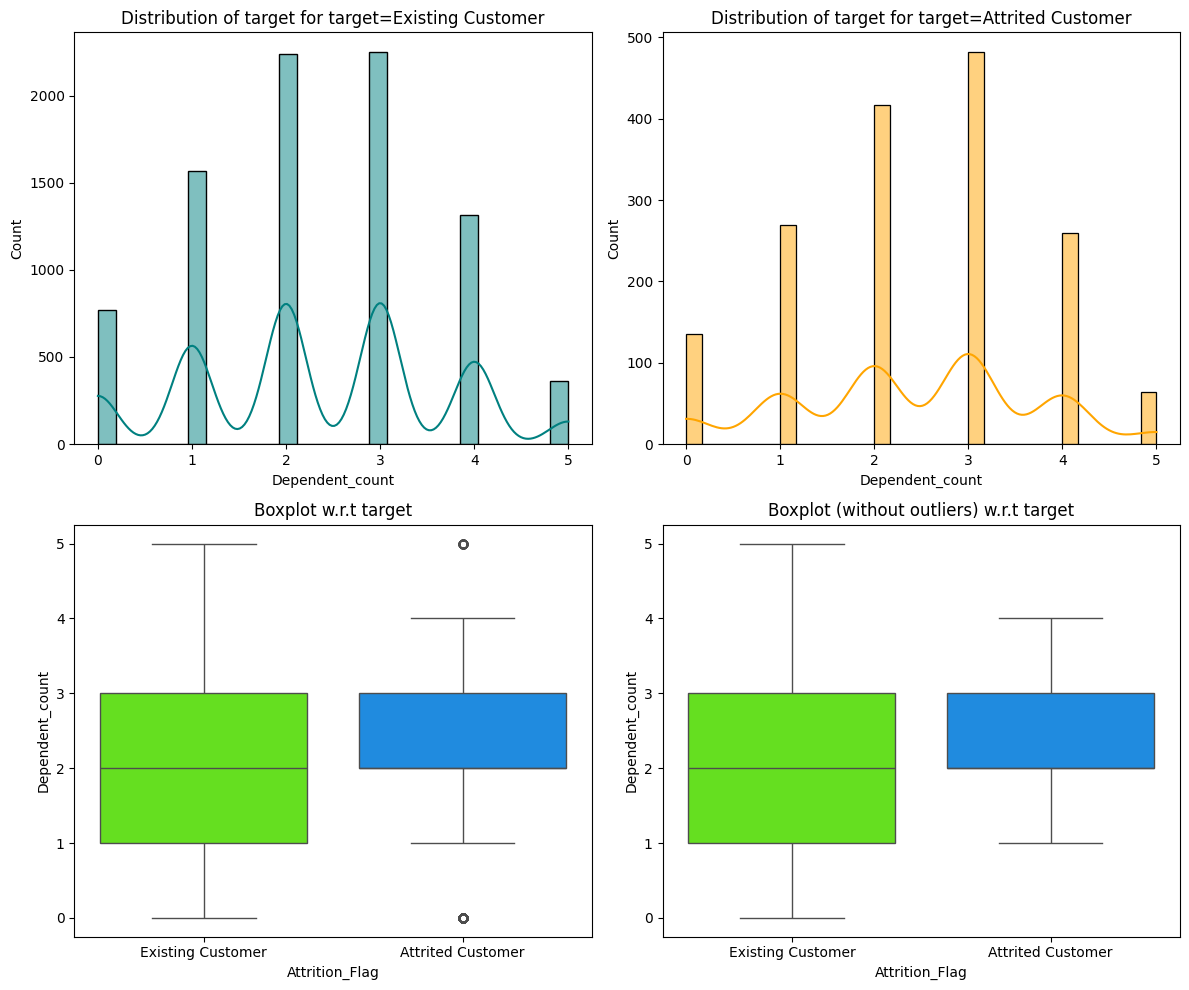

In [ ]:
#Histogram and box plots of Dependent Count by Attrition Flag
distribution_plot_wrt_target(data, 'Dependent_count', 'Attrition_Flag')

###**Observations:**
* Dependent Count distribution for both existing and attrited customers are similar
* Most existing customers and attrited customers have 2 to 3 dependents
* Only dependent count outliers exist for attrited customers at around 0 or 5 dependents

###**Income Category by Attrition Flag**

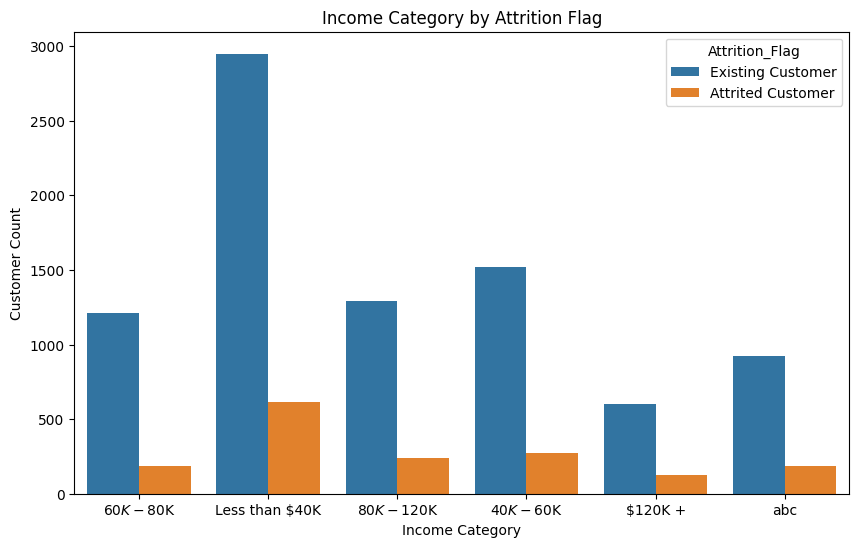

In [ ]:
#Set figure size
plt.figure(figsize=(10, 6))

#Count Plot for Income Category by Attrition Flag
sns.countplot(data=data, x='Income_Category', hue='Attrition_Flag')

#Include title
plt.title('Income Category by Attrition Flag')

#Label x and y axes
plt.xlabel('Income Category')
plt.ylabel('Customer Count')

plt.show()

###**Observations:**
* Most of the existing and attrited customers make less than \$40K per year
* Slightly more existing and attrited customers belong in the \$80-$120K category than in \$60-\$80K category
* "abc" represents an unknown income category
  * For imputation purposes, the "abc" values will be replaced by the mode of "Less than \$40K"

###**Months on Book by Attrition Flag**

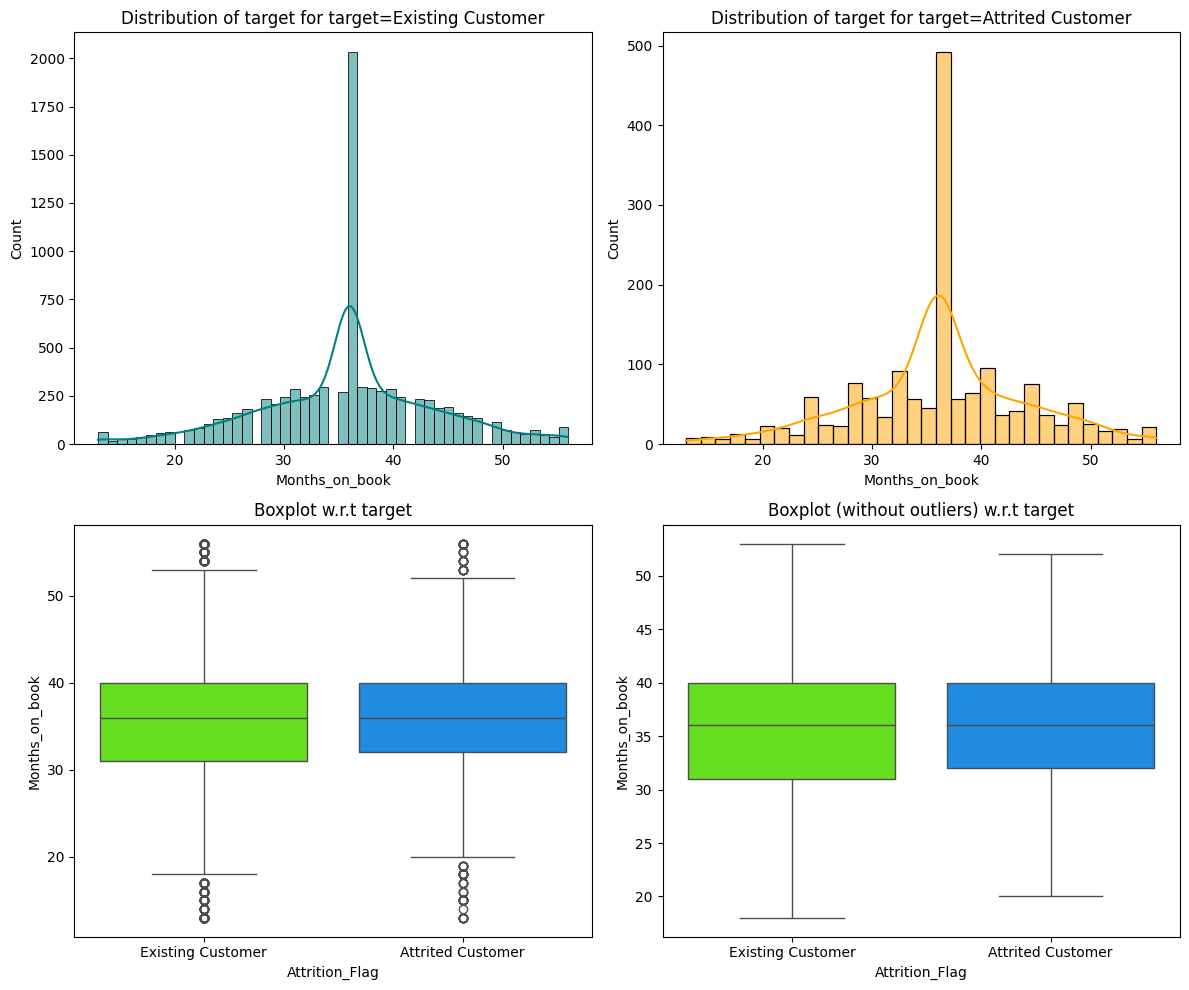

In [ ]:
#Histogram and box plots of Months on Book by Attrition Flag
distribution_plot_wrt_target(data, 'Months_on_book', 'Attrition_Flag')

###**Observations:**
* Months on Book for existing and attrited customers have a similar and somewhat normal distribution
* The average existing or attrited customers has been a member at the bank for at least 3 years
* Outliers for both customer types exists for less than 20 months or more than 50 months of membership

###**Total Relationship Count by Attrition Flag**

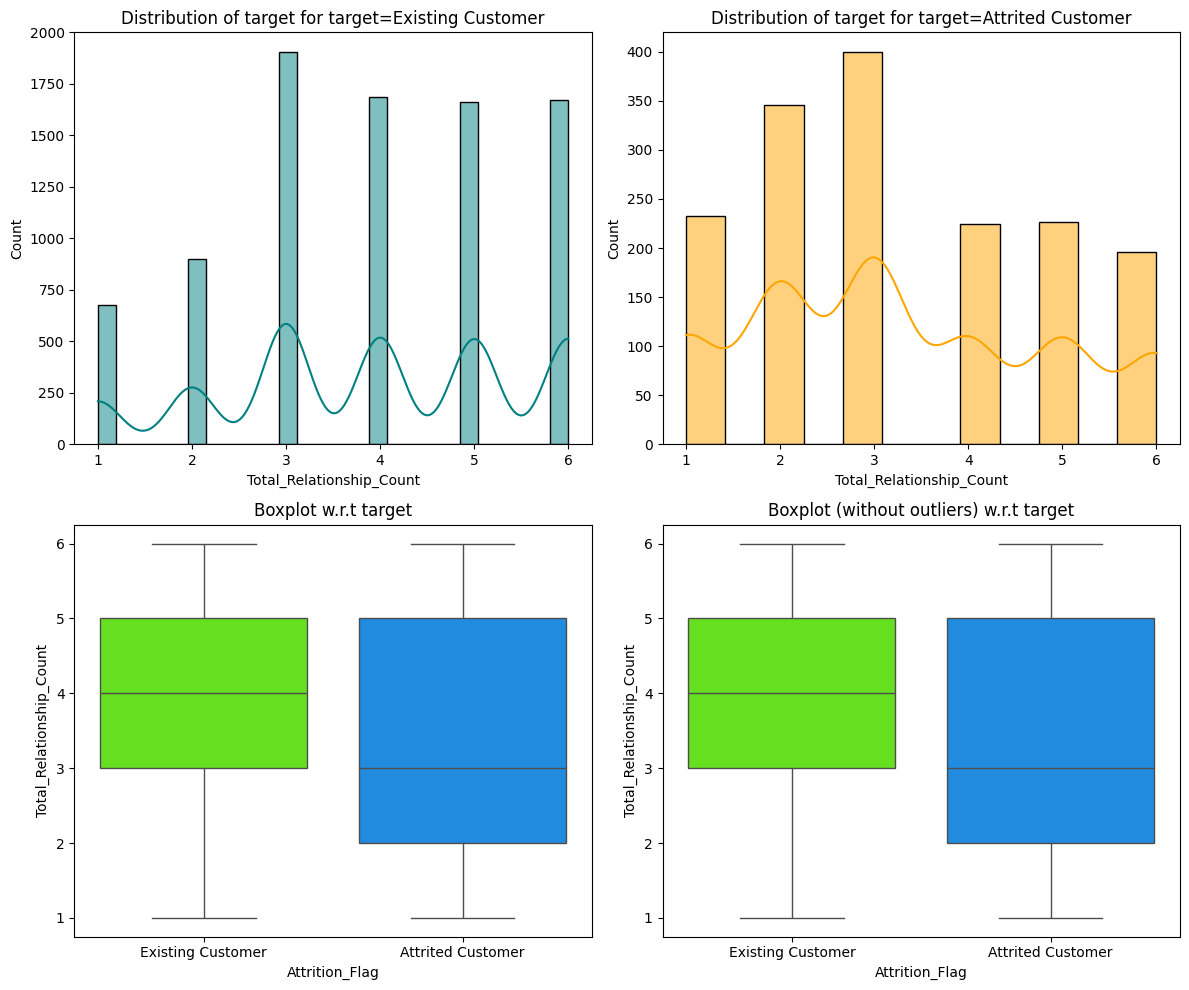

In [ ]:
#Histogram and box plots of Total Relationship Count by Attrition Flag
distribution_plot_wrt_target(data, 'Total_Relationship_Count', 'Attrition_Flag')

###**Observations:**
* Total Relationship Count Distribution:
  * Existing Customers: left-skewed
  * Attrited Customers: right-skewed
* Most of the existing and attrited customers have owned 3 products
* Median:
  * Existing Customers: 4 products owned
  * Attrited Customers: 3 products owned

###**Months Inactive (Past 12 Months)**

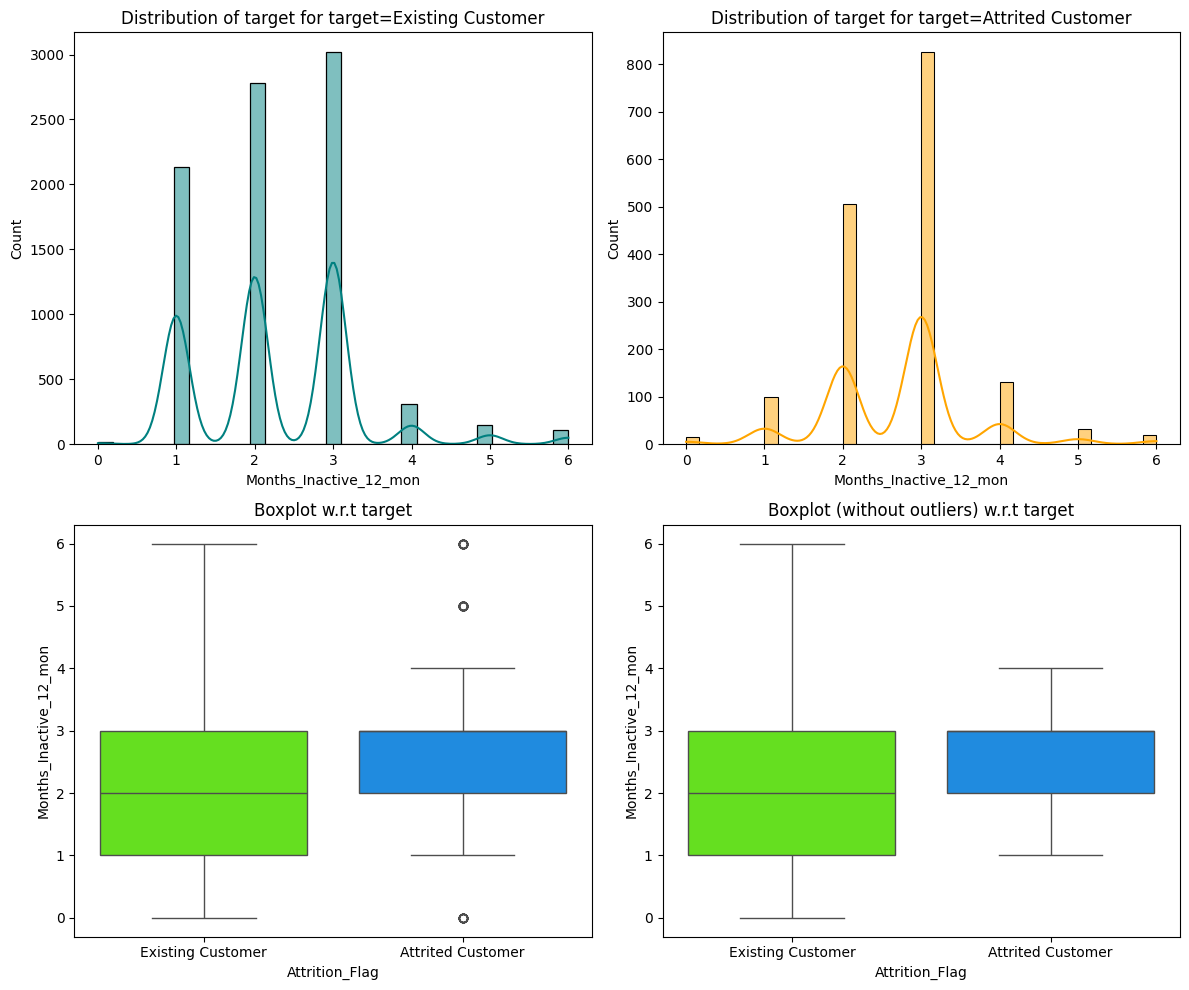

In [ ]:
#Histogram and box plots of Months Inactive by Attrition Flag
distribution_plot_wrt_target(data, 'Months_Inactive_12_mon', 'Attrition_Flag')

###**Observations:**
* Months Inactive (Past 12 Months) Distribution:
  * Existing Customers: right-skewed
  * Attrited Customers: approximately normal
* Most existing and attrited customers have been inactive around 3 months
* Outliers for months inactive exist only for attrited customers:
  * Around 0, 5, or 6 months

###**Average Open to Buy by Attrition Flag**

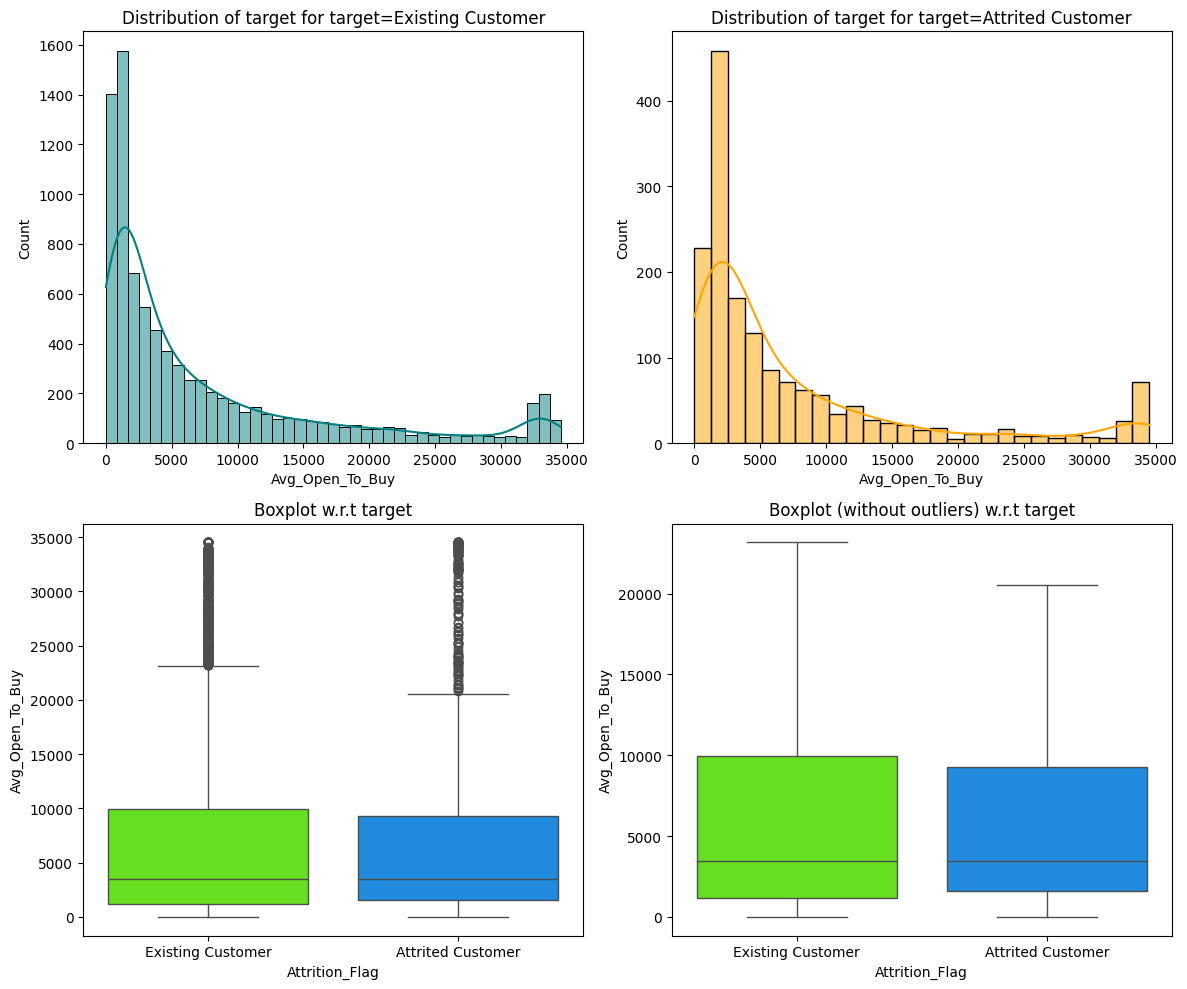

In [ ]:
#Histogram and box plots of Average Open to Buy by Attrition Flag
distribution_plot_wrt_target(data, 'Avg_Open_To_Buy', 'Attrition_Flag')

###**Observations:**
* Average Open to Buy for both existing and attrited customers are right-skewed distributions
* Most of the existing customers have an average open to buy amount of around \$1,000 to \$1,500
* Most of the attrited customers have an average open to buy amount of about \$1,500 to \$2,000
* Outliers exist in both customer types

###**Total Transaction Amount by Attrition Flag**

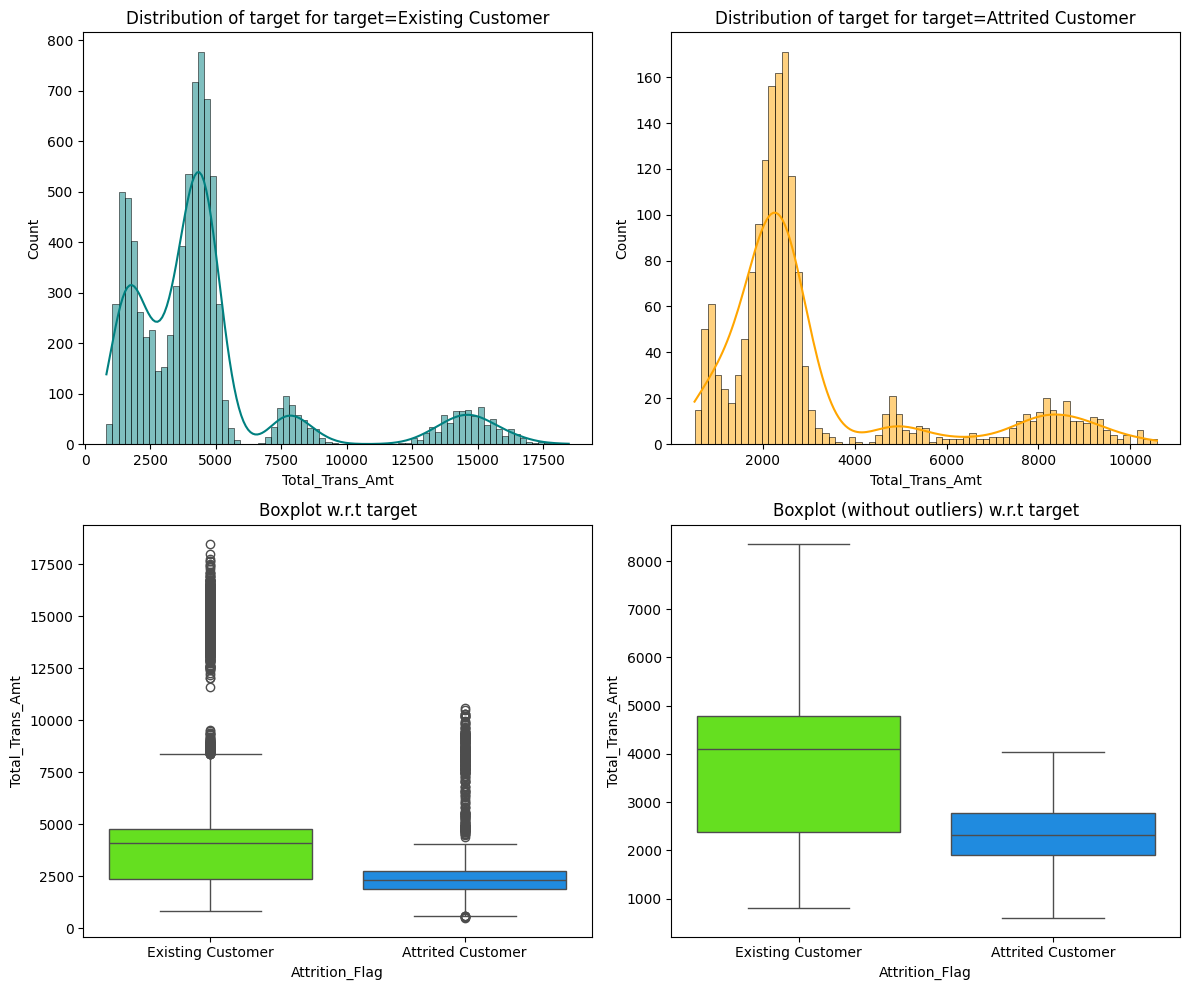

In [ ]:
#Histogram and box plots of Total Transaction Amount by Attrition Flag
distribution_plot_wrt_target(data, 'Total_Trans_Amt', 'Attrition_Flag')

###**Observations:**
* Total Transaction Amount in both existing and attrited customers have a right-skewed distribution
* Existing customers tend to have a higher transaction count than attrited customers
* Median:
  * Existing Customers: Close to \$4,400
  * Attrited Customers: Around \$2,500
* Outliers exist for both customer types

###**Total Transaction Count**

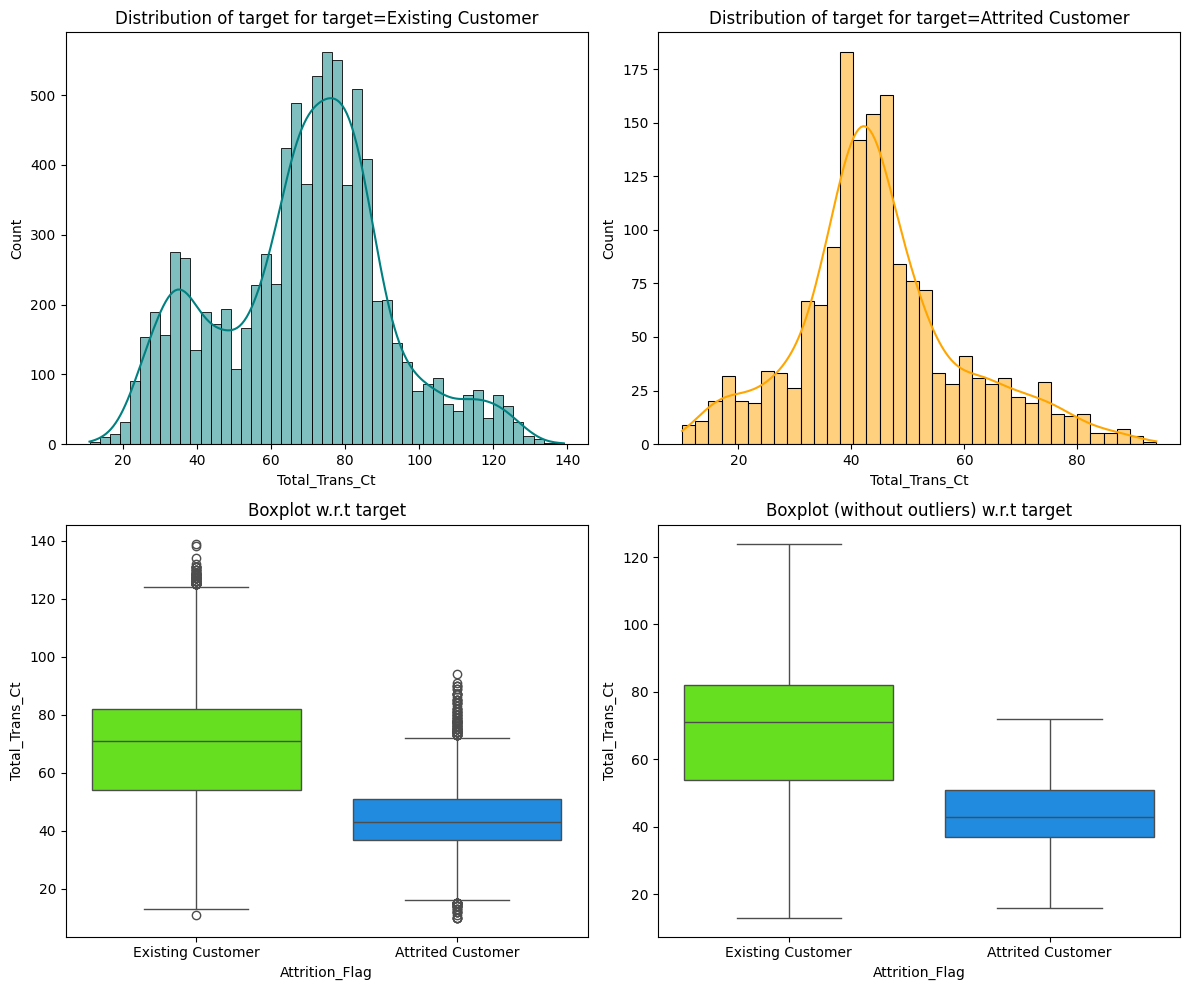

In [ ]:
#Histogram and box plots of Total Transaction Count by Attrition Flag
distribution_plot_wrt_target(data, 'Total_Trans_Ct', 'Attrition_Flag')

###**Observations:**
* Total Transaction Count for existing and attrited customers both have somewhat of a normal distribution
* The majority of existing customers have made between 60 to 80 transactions
* Most of the attrited customers have made 40 to 50 transactions
* Outliers are presents for both customer types
* Maximum transaction count:
  * Existing Customers: close to 140 transactions
  * Attrited Customers: around 100 transactions

###**Total Transaction Count Change (Q4 / Q1 Ratio)**

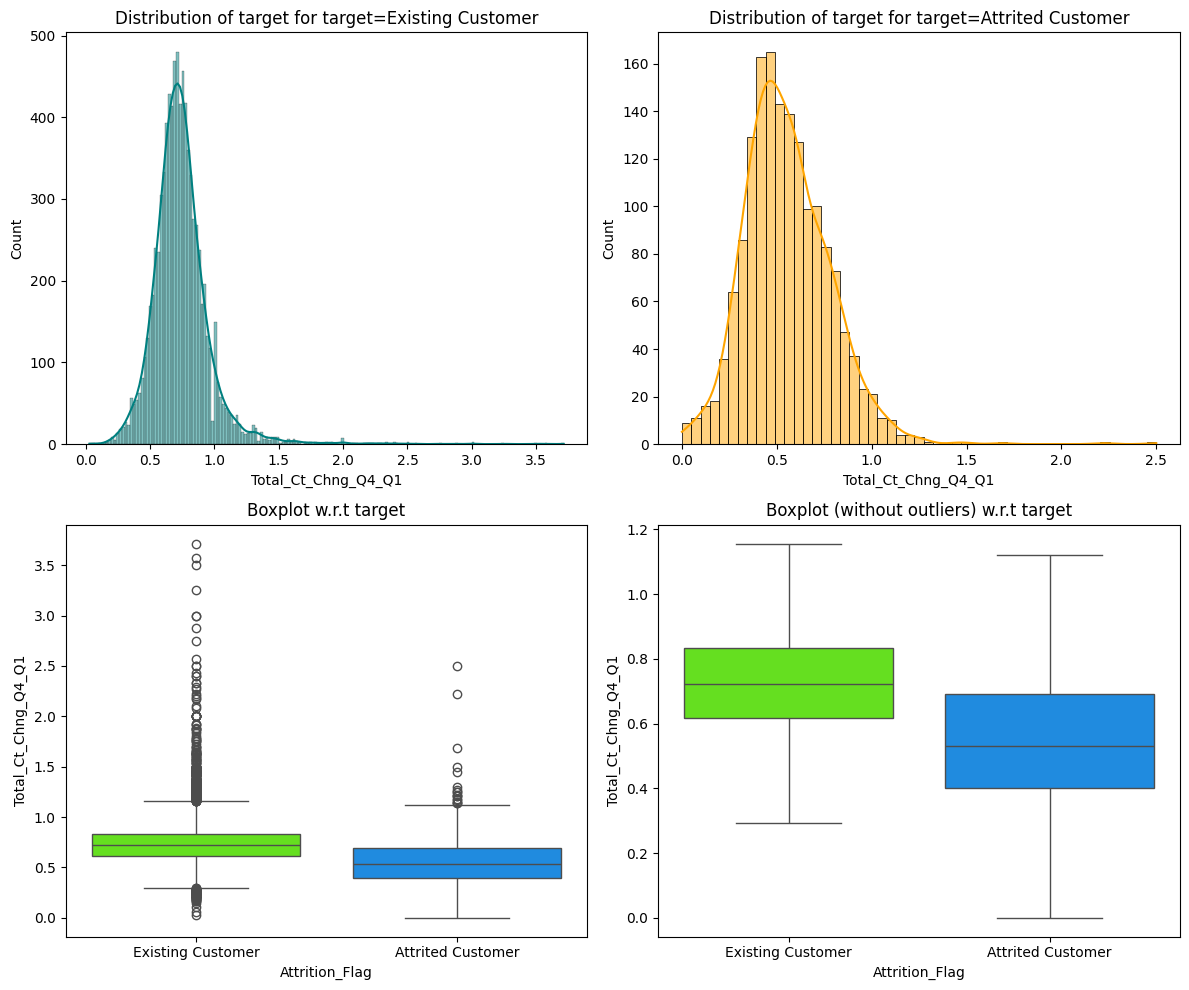

In [ ]:
#Histogram and box plots of Total Transaction Count Change (Q4 / Q1) by Attrition Flag
distribution_plot_wrt_target(data, 'Total_Ct_Chng_Q4_Q1', 'Attrition_Flag')

###**Observations:**
* Total Transaction Count Change for existing and attrited customers have relatively normal distributions
* Most of the existing customers in Q4 made about 70% of their total transactions in Q1
* Most of the attrited customers in Q4 made about 50% of their total transactions in Q1
* Outliers exists for both customer types:
  * Existing Customers: ratios of about 0.25 or less and around 1.25 up to 4
  * Attrited Customers: ratios of about 1.25 up to 2.5


## Data Pre-processing

###**Outlier Detection**

In [ ]:
#Create empty list to insert numerical features
numerical_features = ['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon','Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

#Acquire total number of outliers (if any) for each feature
for feature in numerical_features:
  #Get the 1st and 3rd quartiles for each feature
  Q1 = data[feature].quantile(0.25)
  Q3 = data[feature].quantile(0.75)

  #Find IQR
  IQR = Q3 - Q1

  #Get lower and upper fences
  lower_fence = Q1 - 1.5*IQR
  upper_fence = Q3 + 1.5*IQR

  #Filter dataframe for records that are less than the lower fence or greater than the upper fence
  #Get total number of outliers
  outliers = data[(data[feature] < lower_fence) | (data[feature] > upper_fence)].shape[0]

  #Print percentage
  print(f'{feature} has {round((outliers/data.shape[0])*100, 2)}% outliers')

Customer_Age has 0.02% outliers
Dependent_count has 0.0% outliers
Months_on_book has 3.81% outliers
Total_Relationship_Count has 0.0% outliers
Months_Inactive_12_mon has 3.27% outliers
Contacts_Count_12_mon has 6.21% outliers
Credit_Limit has 9.72% outliers
Total_Revolving_Bal has 0.0% outliers
Avg_Open_To_Buy has 9.51% outliers
Total_Amt_Chng_Q4_Q1 has 3.91% outliers
Total_Trans_Amt has 8.85% outliers
Total_Trans_Ct has 0.02% outliers
Total_Ct_Chng_Q4_Q1 has 3.89% outliers
Avg_Utilization_Ratio has 0.0% outliers


###**Observations:**
* We can see that a few features do not have any outliers
* Credit Limit, Total Transaction Amount, and Contacts Count (12 months) have the most outliers
* There will be no treatment of outliers for a couple of reasons:
  * Extreme values do occur in real life scenarios:
    * Customers can have very high credit limits
    * Customers can spend high amounts on credit cards
    * Customers can make several calls to the bank
  * Some of the models such as bagging and random forest are robust to outliers
* Decision trees and boosting techniques are more sensitive to outliers, but we will see how they perform

###**Treating Gender Feature and Target**

In [ ]:
#Convert Gender to Female = 0, Male = 1
data['Gender'] = data['Gender'].map({'F': 0, 'M': 1})

#Convert Attrition Flag to numerical data type - Existing Customer = 0, Attrited Customer = 1
data['Attrition_Flag'] = data['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

###**Income Category Treatment**

In [ ]:
#Replace "abc" with NAs
data['Income_Category'] = data['Income_Category'].replace('abc', np.nan)

###**Prepare Features and Target Dataframes For Modeling**

In [ ]:
#Set features dataframe
X = data.drop(['CLIENTNUM', 'Attrition_Flag'], axis=1)

#Set target dataframe
y = data['Attrition_Flag']

#Replace True with 1 and False with 0
X = X.replace({True: 1, False: 0})

###**Split data into temporary and testing sets**

In [ ]:
#Split features and target into temporary and testing sets - temporary 80% / testing 20%
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
#Check shape of temporary and testing sets
print(f'Temporary set shape: {X_temp.shape}')
print(f'Testing set shape: {X_test.shape}')

Temporary set shape: (8101, 19)
Testing set shape: (2026, 19)


###**Split temporary set into training and validation sets**

In [ ]:
#Split temporary into training and validation sets - 75% for training and 25% for validation
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp)

In [ ]:
#Check shape of training and validation sets
print(f'Training set shape: {X_train.shape}')
print(f'Validation set shape: {X_val.shape}')

Training set shape: (6075, 19)
Validation set shape: (2026, 19)


###**Missing Value Treatment - Training, Testing, and Validation Sets**

In [ ]:
#Columns to impute
cols_to_impute = ['Education_Level', 'Marital_Status', 'Income_Category']

#Impute the missing values in Education Level, Marital Status, and Income Category
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

#Fit and transform the imputer on training set
X_train[cols_to_impute] = imp_mode.fit_transform(X_train[cols_to_impute])

#Transform the imputer on validation set
X_val[cols_to_impute] = imp_mode.transform(X_val[cols_to_impute])

#Transform the imputer on testing set
X_test[cols_to_impute] = imp_mode.transform(X_test[cols_to_impute])

###**Encode Categorical Features**

In [ ]:
#Encode categorical features with get_dummies
X_train = pd.get_dummies(data=X_train, drop_first=True)
X_val = pd.get_dummies(data=X_val, drop_first=True)
X_test = pd.get_dummies(data=X_test, drop_first=True)

In [ ]:
#Check shape of training, validation, and testing sets
print(f'Training set shape: {X_train.shape}')
print(f'Validation set shape: {X_val.shape}')
print(f'Testing set shape: {X_test.shape}')

Training set shape: (6075, 29)
Validation set shape: (2026, 29)
Testing set shape: (2026, 29)


### Model evaluation criterion

###**Which metric do we want to optimize?**
* There are a couple of possible wrong predictions that we should consider:
  * **False Positives:** Predicting customers to churn when they actually do not renounce their credit cards
  * **False Negatives:** Predicting customers not to churn when they actually do renounce their credit cards
* Our focus is to reduce the number of false negatives to decrease chances of attrition and losing revenue
* Recall is what we want to maximize since it is associated with false negatives




In [ ]:
# Function to calculate different metrics and check performance of classification model
def model_performance_classification_sklearn(model, predictors, target):
    #Predict using the independent variables
    pred = model.predict(predictors)

    #Accuracy score
    acc = accuracy_score(target, pred)

    #Recall score
    recall = recall_score(target, pred)

    #Precision score
    precision = precision_score(target, pred)

    #F1 score
    f1 = f1_score(target, pred)

    #Create metrics dataframe
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1
        },
        index=[0],
    )

    return df_perf

### Model Building - Original Data

###**Define Models - Append to Model List**

In [ ]:
#Empty list to store all the models
models = []

#Appending models into the list
models.append(("Decision tree", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))

###**Train / Validate Models**

In [ ]:
#Get recall scores for each model on training set
print('Training Performance:', '\n')
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    score = recall_score(y_train, y_pred)
    print(f'{name}: {score}')

print('-'*50)

#Get recall scores for each model on validation set
print('Validation Performance:', '\n')
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    score_val = recall_score(y_val, y_pred)
    print(f'{name}: {score_val}')

Training Performance: 

Decision tree: 1.0
Bagging: 0.9846311475409836
Random forest: 1.0
AdaBoost: 0.826844262295082
XGBoost: 1.0
--------------------------------------------------
Validation Performance: 

Decision tree: 0.8159509202453987
Bagging: 0.8006134969325154
Random forest: 0.803680981595092
AdaBoost: 0.852760736196319
XGBoost: 0.901840490797546


###**Observations:**
* Validation results show that XGBoost and AdaBoost have the best recall scores
  * XGBoost: 90.2%
  * AdaBoost: 85.3%

### Model Building - Oversampled data


###**Define Models - Append to Model List**

In [ ]:
#Empty list to store all the oversampled models
models_over = []

#Appending models into the list
models_over.append(("Decision tree", DecisionTreeClassifier(random_state=1)))
models_over.append(("Bagging", BaggingClassifier(random_state=1)))
models_over.append(("Random forest", RandomForestClassifier(random_state=1)))
models_over.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models_over.append(("XGBoost", XGBClassifier(random_state=1)))

###**SMOTE - Oversampling Data**

In [ ]:
#Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

###**Check Oversampling Training and Label Counts**

In [ ]:
#Training count after oversampling
print(f'Oversampling - X_Train Count: {X_train_over.shape[0]}')
print(f'Oversampling - y_Train Count: {y_train_over.shape[0]}')

print('-'*35)

#Label count after oversampling
print(f'Oversampling - Attrited Label Count: {sum(y_train_over == 1)}')
print(f'Oversampling - Existing Label Count: {sum(y_train_over == 0)}')

Oversampling - X_Train Count: 10198
Oversampling - y_Train Count: 10198
-----------------------------------
Oversampling - Attrited Label Count: 5099
Oversampling - Existing Label Count: 5099


###**Train / Validate Models**

In [ ]:
#Get recall scores for each model on training set
print('Training Performance:', '\n')
for name, model in models:
    model.fit(X_train_over, y_train_over)
    y_pred = model.predict(X_train_over)
    score = recall_score(y_train_over, y_pred)
    print(f'{name}: {score}')

print('-'*50)

#Get recall scores for each model on validation set
print('Validation Performance:', '\n')
for name, model in models:
    model.fit(X_train_over, y_train_over)
    y_pred = model.predict(X_val)
    score_val = recall_score(y_val, y_pred)
    print(f'{name}: {score_val}')

Training Performance: 

Decision tree: 1.0
Bagging: 0.9978427142576975
Random forest: 1.0
AdaBoost: 0.9635222592665228
XGBoost: 1.0
--------------------------------------------------
Validation Performance: 

Decision tree: 0.8404907975460123
Bagging: 0.8926380368098159
Random forest: 0.8742331288343558
AdaBoost: 0.8895705521472392
XGBoost: 0.911042944785276


###**Observations:**
* The validation results show that XGBoost is again a top performer for recall, followed by Bagging
  * XGBoost: 91.1%
  * Bagging: 89.3%

### Model Building - Undersampled data

###**Define Models - Append to Model List**

In [ ]:
#Empty list to store all the models
models_under = []

#Appending models into the list
models_under.append(("Decision tree", DecisionTreeClassifier(random_state=1)))
models_under.append(("Bagging", BaggingClassifier(random_state=1)))
models_under.append(("Random forest", RandomForestClassifier(random_state=1)))
models_under.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models_under.append(("XGBoost", XGBClassifier(random_state=1)))

###**RUS - Random Undersampling Data**

In [ ]:
#Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

###**Check Undersampling Training and Label Counts**

In [ ]:
#Training count after undersampling
print(f'Oversampling - X_Train Count: {X_train_under.shape[0]}')
print(f'Oversampling - y_Train Count: {y_train_under.shape[0]}')

print('-'*35)

#Label count after undersampling
print(f'Oversampling - Attrited Label Count: {sum(y_train_under == 1)}')
print(f'Oversampling - Existing Label Count: {sum(y_train_under == 0)}')

Oversampling - X_Train Count: 1952
Oversampling - y_Train Count: 1952
-----------------------------------
Oversampling - Attrited Label Count: 976
Oversampling - Existing Label Count: 976


###**Train / Validate Models**

In [ ]:
#Get recall scores for each model on training set
print('Training Performance:', '\n')
for name, model in models:
    model.fit(X_train_under, y_train_under)
    y_pred = model.predict(X_train_under)
    score = recall_score(y_train_under, y_pred)
    print(f'{name}: {score}')

print('-'*50)

#Get recall scores for each model on validation set
print('Validation Performance:', '\n')
for name, model in models:
    model.fit(X_train_under, y_train_under)
    y_pred = model.predict(X_val)
    score_val = recall_score(y_val, y_pred)
    print(f'{name}: {score_val}')

Training Performance: 

Decision tree: 1.0
Bagging: 0.9918032786885246
Random forest: 1.0
AdaBoost: 0.9528688524590164
XGBoost: 1.0
--------------------------------------------------
Validation Performance: 

Decision tree: 0.8865030674846626
Bagging: 0.9294478527607362
Random forest: 0.9355828220858896
AdaBoost: 0.9601226993865031
XGBoost: 0.9693251533742331


###**Observations:**
* Validation results show a similar outcome to original data with XGBoost and AdaBoost at the top
  * XGBoost: 96.9%
  * AdaBoost: 96.0%

###Model Selection:

###**Validation Recall Comparison**

In [ ]:
#Gather cross-validation results data for dataframe
results = {'Model': ['Decision Tree', 'Bagging', 'Random Forest', 'AdaBoost', 'XGBoost'],
           'Original': [81.6, 80.1, 80.4, 85.3, 90.2],
           'Oversampling': [84.0, 89.3, 87.4, 88.9, 99.1],
           'Undersampling': [88.7, 92.9, 93.6, 96.0, 96.9]}

#Create dataframe to show cross-validation recall scores
val_df = pd.DataFrame(results, columns=['Model', 'Original', 'Oversampling', 'Undersampling'])

#Print dataframe
print('Validation: Recall Scores')
val_df

Validation: Recall Scores


,Model,Original,Oversampling,Undersampling
0,Decision Tree,81.600,84.000,88.700
1,Bagging,80.100,89.300,92.900
2,Random Forest,80.400,87.400,93.600
3,AdaBoost,85.300,88.900,96.000
4,XGBoost,90.200,99.100,96.900


###**Model Decision- Hyperparameter Tuning**
* The data science team has decided to tune the following models:
  * XGBoost on original data
  * XGBoost on oversampling data
  * Bagging on oversampling data
  * XGBoost on undersampling data
  * AdaBoost on undersampling data
  * Random Forest on undersampling data
* Here are the reasons why we chose these models:
  * XGBoost performed very well across the board and curious to see if we can maximize its recall
  * Bagging has a decent recall for oversampling and has potential for improvement with tuning
  * AdaBoost has a very high recall on undersampling and will see if tuning improves performance
  * Random Forest has a high recall on undersampling and tuning may boost its score

### Hyperparameter Tuning

###**XGBoost Tuning - Original Data**

In [ ]:
#Define the model
model = XGBClassifier(random_state=1)

#Define the parameter grid to pass into Randomized Search
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.05,0.1],
            'gamma':[1,3],
            'subsample':[0.6,0.8]
            }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring='recall', cv=5, random_state=1)

#Fitting parameters on original training set in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

#Print results
print(f'Best parameters are {randomized_cv.best_params_} with CV score = {randomized_cv.best_score_}:')

Best parameters are {'subsample': 0.6, 'scale_pos_weight': 5, 'n_estimators': 100, 'learning_rate': 0.05, 'gamma': 3} with CV score = 0.9190423861852434:


###**Train Tuned XGBoost - Original Data**

In [ ]:
#Define tuned xgboost model
xgboost_tuned_original = XGBClassifier(n_estimators=100, learning_rate=0.05, gamma=3, subsample=0.6, scale_pos_weight=5)

#Fit tuned model on training set
xgboost_tuned_original.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

###**Check Model Performance - Training / Validation**

In [ ]:
#Check model performance on training set
model_performance_classification_sklearn(xgboost_tuned_original, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.979,0.996,0.886,0.938


In [ ]:
#Check model performance on validation set
model_performance_classification_sklearn(xgboost_tuned_original, X_val, y_val)

,Accuracy,Recall,Precision,F1
0,0.960,0.942,0.832,0.883


###**XGBoost Tuning - Oversampling Data**

In [ ]:
#Define the model
model = XGBClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.05,0.1],
            'gamma':[1,3],
            'subsample':[0.6,0.8]
            }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring='recall', cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

#Print results
print(f'Best parameters are {randomized_cv.best_params_} with CV score = {randomized_cv.best_score_}:')

Best parameters are {'subsample': 0.6, 'scale_pos_weight': 5, 'n_estimators': 100, 'learning_rate': 0.05, 'gamma': 3} with CV score = 0.9858823529411765:


###**Train Tuned XGBoost - Oversampled Data**

In [ ]:
#Define tuned xgboost oversampled model
xgboost_tuned_oversampled = XGBClassifier(n_estimators=100, learning_rate=0.05, gamma=3, subsample=0.6, scale_pos_weight=5)

#Fit tuned model on training oversampled set
xgboost_tuned_oversampled.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

###**Check Model Performance - Training / Validation**

In [ ]:
#Check performance on oversampled training set
model_performance_classification_sklearn(xgboost_tuned_oversampled, X_train_over, y_train_over)

,Accuracy,Recall,Precision,F1
0,0.974,0.999,0.952,0.975


In [ ]:
#Check performance on validation set
model_performance_classification_sklearn(xgboost_tuned_oversampled, X_val, y_val)

,Accuracy,Recall,Precision,F1
0,0.936,0.957,0.731,0.829


###**Bagging Tuning - Oversampled Data**

In [ ]:
#Define model
model = BaggingClassifier(random_state=1)

#Define parameter grid for Randomized Search
param_grid = {
    'n_estimators': [25,50,75],
    'max_features': [0.2,0.4,0.7]
     }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring='recall', cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

#Print results
print(f'Best parameters are {randomized_cv.best_params_} with CV score = {randomized_cv.best_score_}:')

Best parameters are {'n_estimators': 75, 'max_features': 0.7} with CV score = 0.9790188381535145:


###**Train Tuned Bagging - Oversampled Data**

In [ ]:
#Define tuned xgboost oversampled model
bagging_tuned_oversampled = BaggingClassifier(n_estimators=75, max_features=0.7)

#Fit tuned model on training oversampled set
bagging_tuned_oversampled.fit(X_train_over, y_train_over)

BaggingClassifier(max_features=0.7, n_estimators=75)

###**Check Model Performance - Training / Validation**

In [ ]:
#Check performance on oversampled training set
model_performance_classification_sklearn(bagging_tuned_oversampled, X_train_over, y_train_over)

,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


In [ ]:
#Check performance on validation set
model_performance_classification_sklearn(bagging_tuned_oversampled, X_val, y_val)

,Accuracy,Recall,Precision,F1
0,0.961,0.896,0.866,0.881


###**XGBoost Tuning - Undersampling Data**

In [ ]:
#Define the model
model = XGBClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.05,0.1],
            'gamma':[1,3],
            'subsample':[0.6,0.8]
            }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring='recall', cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_under,y_train_under)

#Print results
print(f'Best parameters are {randomized_cv.best_params_} with CV score = {randomized_cv.best_score_}:')

Best parameters are {'subsample': 0.6, 'scale_pos_weight': 5, 'n_estimators': 100, 'learning_rate': 0.05, 'gamma': 3} with CV score = 0.9754264782836213:


###**Train Tuned XGBoost - Undersampling Data**

In [ ]:
#Define tuned xgboost oversampled model
xgboost_tuned_undersampled = XGBClassifier(n_estimators=100, learning_rate=0.05, gamma=3, subsample=0.6, scale_pos_weight=5)

#Fit tuned model on training oversampled set
xgboost_tuned_undersampled.fit(X_train_under, y_train_under)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

###**Check Model Performance - Training / Validation**

In [ ]:
#Check performance on undersampled training set
model_performance_classification_sklearn(xgboost_tuned_undersampled, X_train_under, y_train_under)

,Accuracy,Recall,Precision,F1
0,0.965,1.000,0.935,0.966


In [ ]:
#Check performance on validation set
model_performance_classification_sklearn(xgboost_tuned_undersampled, X_val, y_val)

,Accuracy,Recall,Precision,F1
0,0.899,0.988,0.616,0.759


###**AdaBoost Tuning - Undersampling Data**

In [ ]:
#Define the model
model = AdaBoostClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    'n_estimators': np.arange(50,110,25),
    'learning_rate': [0.01,0.05,0.1],
    'base_estimator': [DecisionTreeClassifier(max_depth=3, random_state=1), DecisionTreeClassifier(max_depth=4, random_state=1)],
     }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring='recall', cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_under,y_train_under)

#Print results
print(f'Best parameters are {randomized_cv.best_params_} with CV score={randomized_cv.best_score_}:')

Best parameters are {'n_estimators': 100, 'learning_rate': 0.05, 'base_estimator': DecisionTreeClassifier(max_depth=4, random_state=1)} with CV score=0.9549188906331765:


###**Train Tuned AdaBoost - Undersampling Data**

In [ ]:
#Define tuned xgboost oversampled model
adaboost_tuned_undersampled = AdaBoostClassifier(n_estimators=100, learning_rate=0.05, base_estimator=DecisionTreeClassifier(max_depth=4, random_state=1))

#Fit tuned model on training oversampled set
adaboost_tuned_undersampled.fit(X_train_under, y_train_under)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                         random_state=1),
                   learning_rate=0.05, n_estimators=100)

###**Check Model Performance - Training / Validation**

In [ ]:
#Check model performance on undersampled training set
model_performance_classification_sklearn(adaboost_tuned_undersampled, X_train_under, y_train_under)

,Accuracy,Recall,Precision,F1
0,0.997,1.000,0.994,0.997


In [ ]:
#Check model performance on validations set
model_performance_classification_sklearn(adaboost_tuned_undersampled, X_val, y_val)

,Accuracy,Recall,Precision,F1
0,0.934,0.951,0.724,0.822


###**Random Forest - Undersampling Data**

In [ ]:
#Define the model
model = RandomForestClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    'n_estimators': [25,50,100],
    'min_samples_leaf': np.arange(1, 5),
    'max_features': [np.arange(0.2, 0.7, 0.1),'sqrt'],
    'max_samples': np.arange(0.3, 0.7, 0.1)
     }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring='recall', cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_under,y_train_under)

#Print results
print(f'Best parameters are {randomized_cv.best_params_} with CV score={randomized_cv.best_score_}:')

Best parameters are {'n_estimators': 100, 'min_samples_leaf': 1, 'max_samples': 0.5, 'max_features': 'sqrt'} with CV score=0.9323652537938253:


###**Train Tuned Random Forest - Undersampling Data**

In [ ]:
#Define tuned xgboost oversampled model
rf_tuned_undersampled = RandomForestClassifier(n_estimators=100, min_samples_leaf=1, max_samples=0.5, max_features='sqrt')

#Fit tuned model on training oversampled set
rf_tuned_undersampled.fit(X_train_under, y_train_under)

RandomForestClassifier(max_samples=0.5)

###**Check Performance - Training / Validation**

In [ ]:
#Check performance on undersampled training set
model_performance_classification_sklearn(rf_tuned_undersampled, X_train_under, y_train_under)

,Accuracy,Recall,Precision,F1
0,0.995,0.998,0.992,0.995


In [ ]:
#Check performance on validation set
model_performance_classification_sklearn(rf_tuned_undersampled, X_val, y_val)

,Accuracy,Recall,Precision,F1
0,0.924,0.914,0.704,0.796


###**Training / Validation Comparison**

In [ ]:
#Get tuned models' performance dataframes for training
xgboost_tuned_training = model_performance_classification_sklearn(xgboost_tuned_original, X_train, y_train)
xgboost_tuned_oversampled_training = model_performance_classification_sklearn(xgboost_tuned_oversampled, X_train_over, y_train_over)
bagging_tuned_oversampled_training = model_performance_classification_sklearn(bagging_tuned_oversampled, X_train_over, y_train_over)
xgboost_tuned_undersampled_training = model_performance_classification_sklearn(xgboost_tuned_undersampled, X_train_under, y_train_under)
adaboost_tuned_undersampled_training = model_performance_classification_sklearn(adaboost_tuned_undersampled, X_train_under, y_train_under)
rf_tuned_undersampled_training = model_performance_classification_sklearn(rf_tuned_undersampled, X_train_under, y_train_under)

#Concatenate model performance results into a single training dataframe
training_df = pd.concat([xgboost_tuned_training, xgboost_tuned_oversampled_training, bagging_tuned_oversampled_training,
                         xgboost_tuned_undersampled_training, adaboost_tuned_undersampled_training, rf_tuned_undersampled_training])

#Set index to model names
training_df.index = ['XGBoost Tuned Original', 'XGBoost Tuned Oversampled', 'Bagging Tuned Oversampled', 'XGBoost Tuned Undersampled', 'AdaBoost Tuned Undersampled', 'Random Forest Tuned Undersampled']

#Print dataframe
training_df.T

,XGBoost Tuned Original,XGBoost Tuned Oversampled,Bagging Tuned Oversampled,XGBoost Tuned Undersampled,AdaBoost Tuned Undersampled,Random Forest Tuned Undersampled
Accuracy,0.979,0.974,1.000,0.965,0.997,0.995
Recall,0.996,0.999,1.000,1.000,1.000,0.998
Precision,0.886,0.952,1.000,0.935,0.994,0.992
F1,0.938,0.975,1.000,0.966,0.997,0.995


In [ ]:
#Get tuned models' performance for validation
xgboost_tuned_validation = model_performance_classification_sklearn(xgboost_tuned_original, X_val, y_val)
xgboost_tuned_oversampled_validation = model_performance_classification_sklearn(xgboost_tuned_oversampled, X_val, y_val)
bagging_tuned_oversampled_validation = model_performance_classification_sklearn(bagging_tuned_oversampled, X_val, y_val)
xgboost_tuned_undersampled_validation = model_performance_classification_sklearn(xgboost_tuned_undersampled, X_val, y_val)
adaboost_tuned_undersampled_validation = model_performance_classification_sklearn(adaboost_tuned_undersampled, X_val, y_val)
rf_tuned_undersampled_validation = model_performance_classification_sklearn(rf_tuned_undersampled, X_val, y_val)

#Concatenate model performance results into a single validation dataframe
validation_df = pd.concat([xgboost_tuned_validation, xgboost_tuned_oversampled_validation, bagging_tuned_oversampled_validation,
                           xgboost_tuned_undersampled_validation, adaboost_tuned_undersampled_validation, rf_tuned_undersampled_validation])

#Set index to model names
validation_df.index = ['XGBoost Tuned Original', 'XGBoost Tuned Oversampled', 'Bagging Tuned Oversampled', 'XGBoost Tuned Undersampled', 'AdaBoost Tuned Undersampled', 'Random Forest Tuned Undersampled']

#Print dataframe
validation_df.T

,XGBoost Tuned Original,XGBoost Tuned Oversampled,Bagging Tuned Oversampled,XGBoost Tuned Undersampled,AdaBoost Tuned Undersampled,Random Forest Tuned Undersampled
Accuracy,0.960,0.936,0.961,0.899,0.934,0.924
Recall,0.942,0.957,0.896,0.988,0.951,0.914
Precision,0.832,0.731,0.866,0.616,0.724,0.704
F1,0.883,0.829,0.881,0.759,0.822,0.796


###**Observations:**
* Training Performance:
  * All the models had at least 99% or perfect recall scores on training set
  * Accuracy, precision, and F1 scores were fairly high as well
* Validation Performance:
  * XGBoost on original data, oversampled/undersampled data had the best recall
  * XGBoost on undersampled data had the lowest accuracy, precision, and F1 scores
  * XGBoost on original data has a decent balance of all metrics
* It will be interesting to see how the tuned models perform on the testing set

###Tuned Models - Testing

###**XGBoost Tuned Original Testing**

In [ ]:
#Check performance on test set
model_performance_classification_sklearn(xgboost_tuned_original, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.964,0.951,0.844,0.894


###**XGBoost Tuned Oversampled Testing**

In [ ]:
#Check performance on test set
model_performance_classification_sklearn(xgboost_tuned_oversampled, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.942,0.978,0.741,0.844


###**Bagging Tuned Oversampled Testing**

In [ ]:
#Check performance on test set
model_performance_classification_sklearn(bagging_tuned_oversampled, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.962,0.908,0.865,0.886


###**XGBoost Tuned Undersampled Testing**

In [ ]:
#Check performance on test set
model_performance_classification_sklearn(xgboost_tuned_undersampled, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.882,0.997,0.575,0.730


###**AdaBoost Tuned Undersampled Testing**

In [ ]:
#Check performance on test set
model_performance_classification_sklearn(adaboost_tuned_undersampled, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.941,0.969,0.743,0.841


###**Random Forest Tuned Undersampled Testing**

In [ ]:
#Check performance on test set
model_performance_classification_sklearn(rf_tuned_undersampled, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.924,0.954,0.692,0.802


In [ ]:
#Combine testing results in a single dataframe


###**Training / Testing Comparison**

In [ ]:
#Get testing dataframes for each tuned model
xgboost_tuned_original_testing = model_performance_classification_sklearn(xgboost_tuned_original, X_test, y_test)
xgboost_tuned_oversampled_testing = model_performance_classification_sklearn(xgboost_tuned_oversampled, X_test, y_test)
bagging_tuned_oversampled_testing = model_performance_classification_sklearn(bagging_tuned_oversampled, X_test, y_test)
xgboost_tuned_undersampled_testing = model_performance_classification_sklearn(xgboost_tuned_undersampled, X_test, y_test)
adaboost_tuned_undersampled_testing = model_performance_classification_sklearn(adaboost_tuned_undersampled, X_test, y_test)
rf_tuned_undersampled_testing = model_performance_classification_sklearn(rf_tuned_undersampled, X_test, y_test)

#Concatenate dataframes into a single testing dataframe
testing_df = pd.concat([xgboost_tuned_original_testing, xgboost_tuned_oversampled_testing, bagging_tuned_oversampled_testing,
                        xgboost_tuned_undersampled_testing, adaboost_tuned_undersampled_testing, rf_tuned_undersampled_testing])

#Set index to model names
testing_df.index = ['XGBoost Tuned Original', 'XGBoost Tuned Oversampled', 'Bagging Tuned Oversampled', 'XGBoost Tuned Undersampled', 'AdaBoost Tuned Undersampled', 'Random Forest Tuned Undersampled']

In [ ]:
#Print training dataframe
training_df.T

,XGBoost Tuned Original,XGBoost Tuned Oversampled,Bagging Tuned Oversampled,XGBoost Tuned Undersampled,AdaBoost Tuned Undersampled,Random Forest Tuned Undersampled
Accuracy,0.979,0.974,1.000,0.965,0.997,0.995
Recall,0.996,0.999,1.000,1.000,1.000,0.998
Precision,0.886,0.952,1.000,0.935,0.994,0.992
F1,0.938,0.975,1.000,0.966,0.997,0.995


In [ ]:
#Print testing dataframe
testing_df.T

,XGBoost Tuned Original,XGBoost Tuned Oversampled,Bagging Tuned Oversampled,XGBoost Tuned Undersampled,AdaBoost Tuned Undersampled,Random Forest Tuned Undersampled
Accuracy,0.964,0.942,0.962,0.882,0.941,0.924
Recall,0.951,0.978,0.908,0.997,0.969,0.954
Precision,0.844,0.741,0.865,0.575,0.743,0.692
F1,0.894,0.844,0.886,0.730,0.841,0.802


###**Observations:**
* Bagging has perfect performance on training, a good balance on testing metrics, but has the lowest recall
* XGBoost undersampled produced highest recall, but lowest precision on testing
* XGBoost original has a great balance of all metrics on testing with highest F1 score


###Final Model Selection

* XGBoost that was tuned on the original dataset will be our model of choice
* Recall was 99.6% on training set and 95.1% on testing set
* Other metrics on testing were very strong as well:
  * Accuracy: 96.4%
  * Precision: 84.4%
  * F1: 89.4%
* Below are the hyperparameters for the tuned XGBoost model:
  * Number of Estimators: 100
  * Learning Rate: 0.05
  * Gamma: 3
  * Subsample: 0.6
  * Scale Positive Weight: 5


###**Features of Importance - XGBoost Tuned (Original Data)**

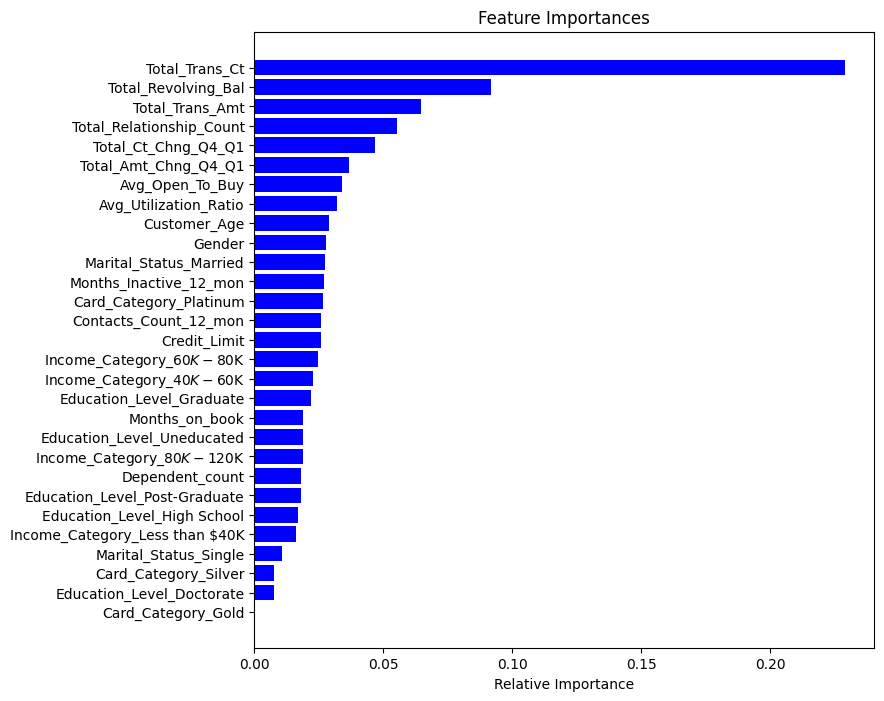

In [ ]:
#Feature names
feature_names = X_train.columns

#Get feature importances and sort indices
importances = xgboost_tuned_original.feature_importances_
indices = np.argsort(importances)

#Get y ticks
y_ticks = [feature_names[i] for i in indices]

#Get indices
index = range(len(indices))

#Set figure size
plt.figure(figsize=(8, 8))

#Plot Feature Importance bar graph
plt.barh(index, importances[indices], color='blue', align='center')

#Include title
plt.title('Feature Importances')

#Label x and y axes
plt.xlabel('Relative Importance')
plt.yticks(index, y_ticks)

plt.show()

###**Observations:**
* The Feature Importances graph tells us the factors that are very likely to contribute to attrition are:
  * Total Transaction Count
  * Total Revolving Balance
  * Total Transaction Amount
  * Total Relationship Count
  * Total Count Change (Q4-Q1 ratio)

###Important Features Analysis

###**Total Transaction Count**

In [ ]:
#Get mean total transaction count by attrition flag
churn.groupby('Attrition_Flag')['Total_Trans_Ct'].mean()

Attrition_Flag
Attrited Customer   44.934
Existing Customer   68.673
Name: Total_Trans_Ct, dtype: float64

* On average, attrited customers have a lower transaction count than existing customers

In [ ]:
#Get mean total transaction count by attrition flag and gender
churn.groupby(['Attrition_Flag', 'Gender'])['Total_Trans_Ct'].mean()

Attrition_Flag     Gender
Attrited Customer  F        44.052
                   M        46.110
Existing Customer  F        71.036
                   M        66.102
Name: Total_Trans_Ct, dtype: float64

* For attritied customers on average, females have a slightly less transaction count than males
* For existing customers on average, females have a slightly higher transaction count than males

###**Total Revolving Balance**

In [ ]:
#Get mean total revolving balance by attrition flag
churn.groupby('Attrition_Flag')['Total_Revolving_Bal'].mean()

Attrition_Flag
Attrited Customer    672.823
Existing Customer   1256.604
Name: Total_Revolving_Bal, dtype: float64

* On average, attrited customers have close to half the revolving balance of existing customers

In [ ]:
#Get mean total revolving balance by attrition flag and gender
churn.groupby(['Attrition_Flag', 'Gender'])['Total_Revolving_Bal'].mean()

Attrition_Flag     Gender
Attrited Customer  F         667.208
                   M         680.316
Existing Customer  F        1239.313
                   M        1275.407
Name: Total_Revolving_Bal, dtype: float64

* For both attrited customers and existing customers on average, males have a higher revolving balance than females

###**Total Transaction Amount**

In [ ]:
#Get mean total transaction amount by attrition flag
churn.groupby('Attrition_Flag')['Total_Trans_Amt'].mean()

Attrition_Flag
Attrited Customer   3095.026
Existing Customer   4654.656
Name: Total_Trans_Amt, dtype: float64

* Existing customers on average spend about \$1,560 more than attrited customers over the past 12 months

In [ ]:
#Get mean total transaction amount by attrition flag and gender
churn.groupby(['Attrition_Flag', 'Gender'])['Total_Trans_Amt'].mean()

Attrition_Flag     Gender
Attrited Customer  F        2784.184
                   M        3509.779
Existing Customer  F        4647.788
                   M        4662.124
Name: Total_Trans_Amt, dtype: float64

* For attrited customers, males on average spend over \$725 more than females over the past 12 months
* For existing customers, males on average spend over \$15 more than females over the past 12 months

###**Total Relationship Count**

In [ ]:
#Get mean total relationship count by attrition flag
churn.groupby('Attrition_Flag')['Total_Relationship_Count'].mean()

Attrition_Flag
Attrited Customer   3.280
Existing Customer   3.915
Name: Total_Relationship_Count, dtype: float64

* The average attrited customer owns slightly less products than the average existing customer

In [ ]:
#Get mean total relationship count by attrition flag and gender
churn.groupby(['Attrition_Flag', 'Gender'])['Total_Relationship_Count'].mean()

Attrition_Flag     Gender
Attrited Customer  F        3.399
                   M        3.121
Existing Customer  F        3.894
                   M        3.937
Name: Total_Relationship_Count, dtype: float64

* The average attrited female customer owns slightly more products than the average attrited female customer
* The average existing male customer owns slightly more products than the average existing female customer

###**Total Count Change (Q4-Q1 Ratio)**

In [ ]:
#Get mean total count change Q4-Q1 by attrition flag
churn.groupby('Attrition_Flag')['Total_Ct_Chng_Q4_Q1'].mean()

Attrition_Flag
Attrited Customer   0.554
Existing Customer   0.742
Name: Total_Ct_Chng_Q4_Q1, dtype: float64

* The average attrited customer generates about 55% the amount of Q1 transactions in Q4
* The average existing customer generates about 74% the amount of Q1 transactions in Q4

###At Risk Customer Analysis

###**Count of Months Inactivity For Attrited Customers**

In [ ]:
#Filter for attrited customers
attrited_customers = churn[churn['Attrition_Flag']=='Attrited Customer']

#Get mean months inactive by gender
attrited_customers['Months_Inactive_12_mon'].value_counts(normalize=True).sort_index()

Months_Inactive_12_mon
0   0.009
1   0.061
2   0.310
3   0.508
4   0.080
5   0.020
6   0.012
Name: proportion, dtype: float64

* Most of the attrited customers tend to be inactive between 2-4 months:
  * 2 Months - 31%
  * 3 Months - 51%
  * 4 Months - 8%
* This accounts for 90% of the attrited customer base

###**Count of Existing At Risk Customers by Gender - Low Transaction Count and Inactivity**

In [ ]:
#Filter for existing customers
existing_customers = churn[churn['Attrition_Flag'] == 'Existing Customer']

#Filter existing customers who generate less than 45 transactions (past 12 months) and have been inactive between 2 to 4 months
inactive_low_transactions = existing_customers[(existing_customers['Total_Trans_Ct'] < 45) & ((existing_customers['Months_Inactive_12_mon'] >= 2) & (existing_customers['Months_Inactive_12_mon'] <= 4))]

#Find male and female count of this population
inactive_low_transactions.groupby('Gender')['Gender'].count()

Gender
F    402
M    718
Name: Gender, dtype: int64

* Cross-section of existing customers who may be at risk of attrition:
  * Constraints:
    * Total Transaction Count - Less than 45 transactions
    * Months Inactive - Between 2 to 4 months
  * Female: 402
  * Male: 718
  * Total: 1,120 customers (about 13.2% of existing customer base)

# Business Insights and Conclusions

###**EDA Summary**
Bank Churners dataset statistics/observations:
* 10,127 rows (customers) and 21 columns
* There were some missing values in the data:
  * Education Level: 1,519
  * Marital Status: 749
  * Income Category ("abc"): 1,112
* Highly correlated pairs of features:
  * Total Transaction Count / Total Transaction Amount - 0.81
  * Customer Age / Months on Book - 0.79
* Moderately correlated pair of features:
  * Total Revolving Balance and Average Utilization Ratio - 0.62
* Dummy variables were utilized on categorical features such as:
  * Education Level
  * Marital Status
  * Income Category
* Outlier Detected on several features:
  * Most significant outlier counts:
    * Credit Limit - 9.72%
    * Average Open to Buy - 9.51%
    * Total Transaction Amount - 8.85%
    * Contacts Count (12 months) - 6.21%
  * Outliers were not treated since extreme values may occur in real world situations and reveal insights
* Unbalanced dataset: Target = Attrition Flag
  * 83.9% are existing customers
  * 16.1% are attrited customers


###**Model Methodology:**
* Model development consisted of three important stages:
  * Training / Validation
  * Hyperparameter Tuning
  * Testing
* 15 different models were trained, validated, tuned, and tested
  * 5 models on original data
  * 5 models on oversampled data (SMOTE)
  * 5 models on undersampled data (RUS)
* Here are the base models below:
  * Decision Tree
  * Bagging
  * Random Forest
  * AdaBoost
  * Extreme Gradient (XG) Boost
* Models were tuned using Randomized Search CV
* Target = Attrition Flag: Class 0 = "Existing Customer"; Class 1 = "Attrited Customer"
* Data was split a couple of ways:
  * Temporary (80%) / Testing (20%)
  * Training (75%) / Validation (25%)
* No features were scaled
* Simple Imputer was used on categorical features such as:
  * Education Level
  * Marital Status
  * Income Category
* Objective was to maximize recall
  * Accurately predict attrited customers who will cancel their credit cards
* Precision needs to be considered as well
  * Reduce incorrect churn predictions for customers who plan to continue using their credit cards
* F1 score is important
  * Balance precision and recall
  * Minimize loss of revenue and advertising costs

###**Model Results**
* XGBoost on the original data had the best performance
* Metric Summary:
  * Training:
    * Accuracy: 97.9%
    * Recall: 99.6%
    * Precision: 88.6%
    * F1: 93.8%
  * Testing:
    * Accuracy: 96.4%
    * Recall: 95.1%
    * Precision: 84.4%
    * F1: 89.4%

###**Recommendations**
* The top features that play a role in deciding customer attrition:
  * Total Transaction Count
  * Total Revolving Balance
  * Total Transaction Amount
  * Total Relationship Count
  * Total Count Change (Q4-Q1 Ratio)
* We learned a few facts about attrited customers:
  * Attrited customers generate less transactions than existing customers
    * Total transaction amounts for attrited customers were also lower than existing customers
    * Total Count Change was less as well:
      * Attrited customers' Q4/Q1 transaction count was less than existing customers
  * Total Revolving Balance was significantly less than existing customers
  * Total Relationship Count was slightly less than existing customers
* Action Items:
  * Contact existing customers who:
    * Generate less transactions - 45 or less (past 12 months)
    * Spend low amounts - \$3,100 or less (past 12 months)
    * Own fewer products - 2 or less
    * Contacted the bank multiple times - 2 or more calls
    * Have been inactive - Between 2 to 4 months
  * Ask these customers about their overall experience with their credit cards:
    * Customer Service
      * Are the representatives friendly and helpful?
      * Wait times - short or long?
    * Website
      * Is it user friendly / highly available?
      * Do the transactions/payments post in a timely manner?
  * Offer these customers an incentive to continue using their credit cards:
    * Cash back on purchases
    * Rewards points
    * Referral bonus for bringing in new customers
* These steps will give us insight about our at risk population and hopefully improve customer retention rate
